In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [326]:
WORKING_PATH = '/content/drive/MyDrive/Colab Notebooks/NLP/Project'

In [327]:
%cd {WORKING_PATH}

/content/drive/MyDrive/Colab Notebooks/NLP/Project


In [328]:
import sys

sys.path.append(WORKING_PATH)

In [6]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
  Created wheel for pyDAWG: filename=pyDAWG-1.0.1-cp311-cp311-linux_x86_64.whl size=627

In [5]:
 !apt-get install gzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gzip is already the newest version (1.10-4ubuntu4.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [250]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 26.5 MB/s eta 0:00:00


In [329]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
import os
import re
import spacy  # Para prepocesamiento
import logging  # Configuración de loggings para monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel


from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # Lo escogí porque es un estándar dado que tiene una listas en varios idiomas.
from wordcloud import WordCloud
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.decomposition import PCA
from time import time  # Tiempo de las operaciones
from collections import defaultdict
from stop_words import get_stop_words
from num2words import num2words
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Para manejar el desequilibrio de clases
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Usar el Pipeline de imblear

# Para corregir ortografía
from spellchecker import SpellChecker

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


# --- Descargar recursos de NLTK
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Descargando stopwords de NLTK...")
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Descargando punkt de NLTK...")
    nltk.download('punkt')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Descargando wordnet de NLTK...")
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("Descargando omw-1.4 de NLTK...")
    nltk.download('omw-1.4')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Descargando punkt_tab de NLTK...")
    nltk.download('punkt_tab')

Descargando wordnet de NLTK...
Descargando omw-1.4 de NLTK...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Descarga y exploración del corpus

In [330]:
# Reemplaza 'nombre_del_archivo.json.gz' con el nombre real de tu archivo
nombre_archivo_comprimido = 'reviews_Automotive_5.json.gz'
nombre_archivo_descomprimido = 'reviews_Automotive_5.json'

try:
    with gzip.open(nombre_archivo_comprimido, 'rt') as f_in:
        with open(nombre_archivo_descomprimido, 'wt') as f_out:
            # Lee línea por línea y escribe en el archivo descomprimido
            for line in f_in:
              f_out.write(line)

    print(f"Archivo {nombre_archivo_comprimido} descomprimido a {nombre_archivo_descomprimido}")

except FileNotFoundError:
    print(f"Error: Archivo no encontrado: {nombre_archivo_comprimido}")
except Exception as e:
    print(f"Error al descomprimir o leer el archivo: {e}")

Archivo reviews_Automotive_5.json.gz descomprimido a reviews_Automotive_5.json


In [333]:
def load_automovil_reviews(file_path ):

    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))

    df = pd.DataFrame(data)

    return df

In [334]:
df = load_automovil_reviews(nombre_archivo_descomprimido)

In [335]:
# Filas y columnas
print(f"Dimensiones: {df.shape}")

Dimensiones: (20473, 9)


In [336]:
print("\nPrimeras 5 filas del DataFrame:")
df.head().T


Primeras 5 filas del DataFrame:


,0,1,2,3,4
reviewerID,A3F73SC1LY51OO,A20S66SKYXULG2,A2I8LFSN2IS5EO,A3GT2EWQSO45ZG,A3ESWJPAVRPWB4
asin,B00002243X,B00002243X,B00002243X,B00002243X,B00002243X
reviewerName,Alan Montgomery,alphonse,Chris,DeusEx,E. Hernandez
helpful,"[4, 4]","[1, 1]","[0, 0]","[19, 19]","[0, 0]"
reviewText,I needed a set of jumper cables for my new car...,"These long cables work fine for my truck, but ...",Can't comment much on these since they have no...,I absolutley love Amazon!!! For the price of ...,I purchased the 12' feet long cable set and th...
overall,5.0,4.0,5.0,5.0,5.0
summary,Work Well - Should Have Bought Longer Ones,Okay long cables,Looks and feels heavy Duty,Excellent choice for Jumper Cables!!!,"Excellent, High Quality Starter Cables"
unixReviewTime,1313539200,1315094400,1374710400,1292889600,1341360000
reviewTime,"08 17, 2011","09 4, 2011","07 25, 2013","12 21, 2010","07 4, 2012"


In [337]:
print("\nInformación del DataFrame:")
df.info()
#Podemos observar que no tenemos campos nulos en todas nuestras columnas


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20473 entries, 0 to 20472
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      20473 non-null  object 
 1   asin            20473 non-null  object 
 2   reviewerName    20260 non-null  object 
 3   helpful         20473 non-null  object 
 4   reviewText      20473 non-null  object 
 5   overall         20473 non-null  float64
 6   summary         20473 non-null  object 
 7   unixReviewTime  20473 non-null  int64  
 8   reviewTime      20473 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In [338]:
# Revisemos los valoers en overall
df['overall'].value_counts()

,count
overall,
5.0,13928
4.0,3967
3.0,1430
2.0,606
1.0,542


In [339]:
# Vamos a crear un nuevo dataframe con las columnas 'reviewText' (de donde analizaremos el sentimiento) y 'overall' (es la puntuación que los usuarios otrogaron)
df_to_work = df[['reviewText', 'overall']].copy()

In [340]:
print("\nPrimeras 10 filas del DataFrame:")
df_to_work.head(10)


Primeras 10 filas del DataFrame:


,reviewText,overall
0,I needed a set of jumper cables for my new car...,5.0
1,"These long cables work fine for my truck, but ...",4.0
2,Can't comment much on these since they have no...,5.0
3,I absolutley love Amazon!!! For the price of ...,5.0
4,I purchased the 12' feet long cable set and th...,5.0
5,"These Jumper cables are heavy Duty, Yet easy t...",5.0
6,bought these for my k2500 suburban plenty of l...,5.0
7,these are good enough to get most motorized ve...,5.0
8,The Coleman Cable 08665 12-Feet Heavy-Duty Tru...,4.0
9,"I have an old car, Its bound to need these som...",5.0


In [341]:
# Necesitamos definir nuestro sentimiento binario
# Positivo: 4 o 5 puntos
# Negativo: 1, 2 o 3 puntos
# Vamos a crear una nueva columna 'sentiment' donde le asignaremos positivo o negativo según el valor que tengan en 'overall'
df_to_work['sentiment'] = 'negative' # Default to negative
df_to_work.loc[df_to_work['overall'] >= 4, 'sentiment'] = 'positive'

df_to_work.head()

,reviewText,overall,sentiment
0,I needed a set of jumper cables for my new car...,5.0,positive
1,"These long cables work fine for my truck, but ...",4.0,positive
2,Can't comment much on these since they have no...,5.0,positive
3,I absolutley love Amazon!!! For the price of ...,5.0,positive
4,I purchased the 12' feet long cable set and th...,5.0,positive


In [342]:
print("\nVeamos la distribución de los sentimientos:")
df_to_work['sentiment'].value_counts()


Veamos la distribución de los sentimientos:


,count
sentiment,
positive,17895
negative,2578


In [343]:
# Tomamos las stopwords en inglés, dado que las reseñas que pudimos observar en nuestro conjunto de datos esta en inglés.
# Las stop-words no son palabras que nos aporten un significado semántico relevante.
# Al eliminarlas nos ayuda a reducir el ruido y enfocarnos en las palabras más significativas.
# Nota: existen palabras que debemos quitar de nuestro listado como es el caso de 'not' or 'don't' porque puede aportar información.
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [344]:
# Vamos a guardar las palabras no queremos que sean stop-words. Porque nos indican:
# Negación (not", "no", "nor", "don't", "doesn't",etc.),
# Intesificadores ("very"),
# Cuantificadores ("few", "more", "most", etc.),
# Oposición ("against")
# Auxiliar de poder ("can")
# Extensión de algún problema o característica ("further")
no_stop_words = ["not", "no", "nor", "don't", "doesn't", "doesn", "didn't", "didn", "aren't", "aren", "couldn't", "couldn",
             "hadn't", "hadn", "hasn't", "hasn", "haven't", "isn't", "isn", "mightn't", "mightn", "mustn't", "mustn",
             "needn't", "needn", "shan't",  "shan", "shouldn't", "shouldn", "wasn't", "wasn", "weren't", "weren",
             "won't", "wouldn't", "wouldn", "very", "any", "few", "more", "most", "against", "can", "further", "only", "too", "needn't"]

In [345]:
# Elimina las palabras que no queremos que sean stop-words de la lista de stop-words
for word in no_stop_words:
    if word in stop_words: # Verifica si la palabra está en la lista antes de intentar removerla
        stop_words.remove(word)

print(f"Stopwords originales: {len(stopwords.words('english'))}")
print(f"Stopwords después de quitar negaciones (ejemplo): {len(stop_words)}")

Stopwords originales: 198
Stopwords después de quitar negaciones (ejemplo): 152


In [346]:
df_to_work.head()

,reviewText,overall,sentiment
0,I needed a set of jumper cables for my new car...,5.0,positive
1,"These long cables work fine for my truck, but ...",4.0,positive
2,Can't comment much on these since they have no...,5.0,positive
3,I absolutley love Amazon!!! For the price of ...,5.0,positive
4,I purchased the 12' feet long cable set and th...,5.0,positive


In [347]:
all_words = []
# Vamos a iterar sobre el texto de cada reseña para tokenizar y quitar las stop-words.
for review in df_to_work['reviewText']:

    #Quitemos espacios adelante y al final
    review = review.strip()

    # Tokenizamos, es decir, la vamos a dividir en palabras.
    # Necesitamos pasarlas a minúsculas para tener todo igual y así evitamos que una misma palabra se tenga como más por tener mayusculas.
    tokens = word_tokenize(review.lower())

    # Vamos a crear una nueva lista que sale de ir recurriendo los tokens que creamos anteriormente.
    # word.isalpha() --> Si todos los caractereres del token son letras del alfabeto y existe al menos 1
    # Con esto eliminamos los signos de puntación, los tokens que seran puros números así como los tokens que sean una combinación de letras+numeros. Así tenemos solo palabras.
    # Validamos que el token no se encuentren en el listado de palabras que tenemos en stop_words.
    clean_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Almacenamos las palabras con significado para nosostros.
    all_words.extend(clean_tokens)

In [348]:
# Calcula el número de palabras únicas en todo el corpus después de eliminar las stop-words
vocab_cardinality = len(set(all_words))
print(f"Cardinalidad del vocabulario: {vocab_cardinality}")

Cardinalidad del vocabulario: 23920


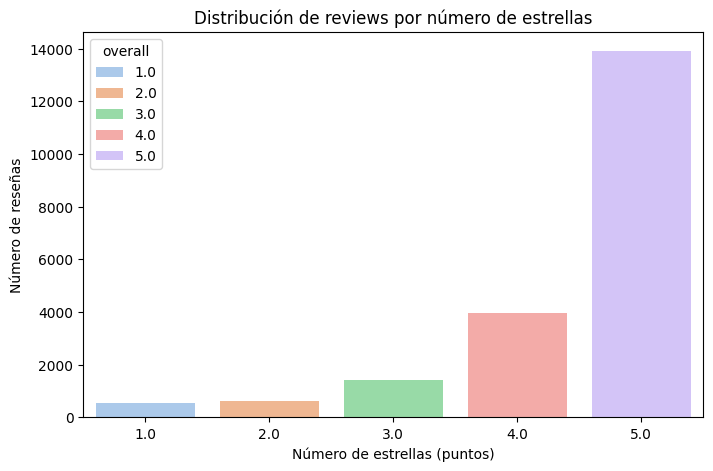

In [349]:
# Distribución de reviews por número de estrellas (puntos), vamos a ver como estan distribuidas
plt.figure(figsize=(8, 5))
sns.countplot(x='overall', data=df_to_work, palette='pastel', hue='overall')
plt.title('Distribución de reviews por número de estrellas')
plt.xlabel('Número de estrellas (puntos)')
plt.ylabel('Número de reseñas')
plt.show()

- Podemos observar que existen muchisimas reseñas altamente positivas, principalmente 5 estrellas.
- Podemos ver un desequilibrio entre las clases 'Positiva' (4 y 5) y las negativas (1, 2 y 3).
- Debemos considerar alguna técnica para mitigar el impacto del desequilibrio, por ejemplo oversampling. También podemos enfocar diferente el problema, es decir, optar por un modelo multi-clase (1,2,3,4,5) y luego agrupar en 'Positiva' y 'Negativo'.

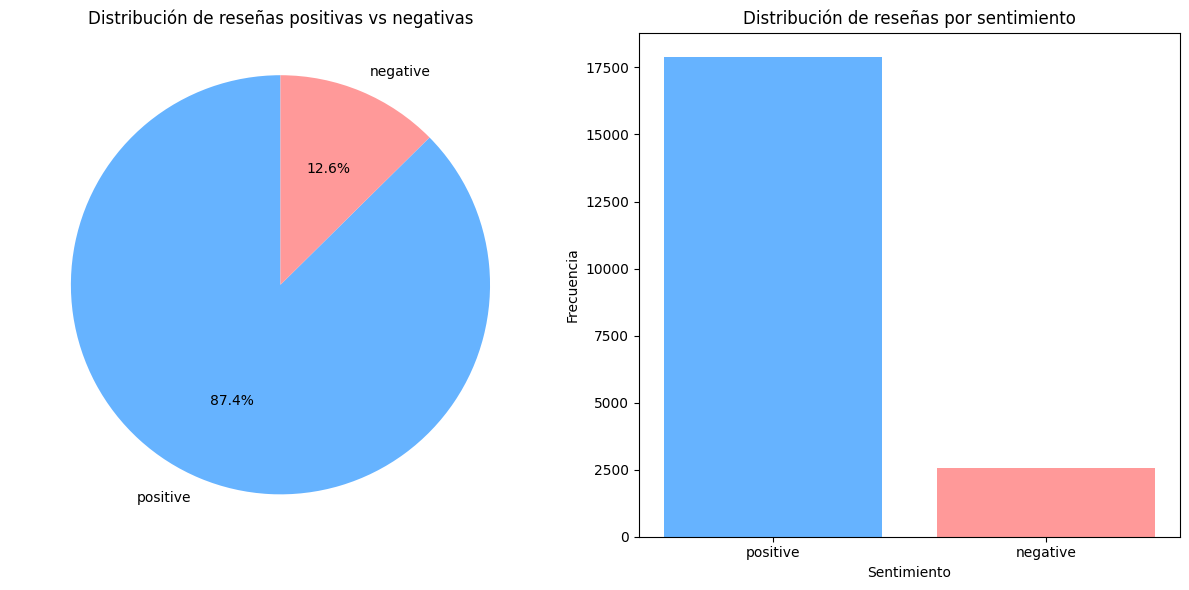

In [350]:
# Calculamos cuantos hay para cada sentimiento.
sentiment_counts = df_to_work['sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de pay
axes[0].pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
axes[0].set_title('Distribución de reseñas positivas vs negativas')
axes[0].axis('equal')

# Gráfica de barras
axes[1].bar(
    sentiment_counts.index,
    sentiment_counts.values,
    color=['#66b3ff', '#ff9999']
)
axes[1].set_title('Distribución de reseñas por sentimiento')
axes[1].set_xlabel('Sentimiento')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Como observabamos en la gráfica anterior los datos están fuertemente desbalanceados hacia el sentimiento positivo.

El mayor problema es que nuestra red aprenda a predecir casi siempre como 'Positiva'.

Después definire que método usar:

  - Undersampling (submuestreo) de la clase mayoritaria.

  - Oversampling (sobremuestreo) de la clase minoritaria.

  - Ajuste de pesos: algunos algoritmos permiten penalizar más los errores de la clase minoritaria.


In [351]:
df_to_work['reviewText']

,reviewText
0,I needed a set of jumper cables for my new car...
1,"These long cables work fine for my truck, but ..."
2,Can't comment much on these since they have no...
3,I absolutley love Amazon!!! For the price of ...
4,I purchased the 12' feet long cable set and th...
...,...
20468,I've bought 10 of these over the past year to ...
20469,"OK, I have to admit, the price of this item di..."
20470,I love my skull face mask. It makes me outstan...
20471,This mask of course as described is half-face ...


In [352]:
# Caculamos la frecuencia de cada palabras
words_frecuendy = Counter(all_words)
#Vamos a ver los 10 más frecuentes
words_most_frecuendy = words_frecuendy.most_common(10)

words_most_frecuendy

[('not', 11705),
 ('use', 8043),
 ('car', 7785),
 ('one', 7098),
 ('very', 6397),
 ('can', 5976),
 ('good', 5770),
 ('great', 5739),
 ('like', 5734),
 ('well', 5627)]


Top 15 unigramas:
[('not', 11705), ('use', 8043), ('car', 7785), ('one', 7098), ('very', 6397), ('can', 5976), ('good', 5770), ('great', 5739), ('like', 5734), ('well', 5627), ('product', 5368), ('would', 5196), ('used', 4949), ('get', 4751), ('more', 4557)]


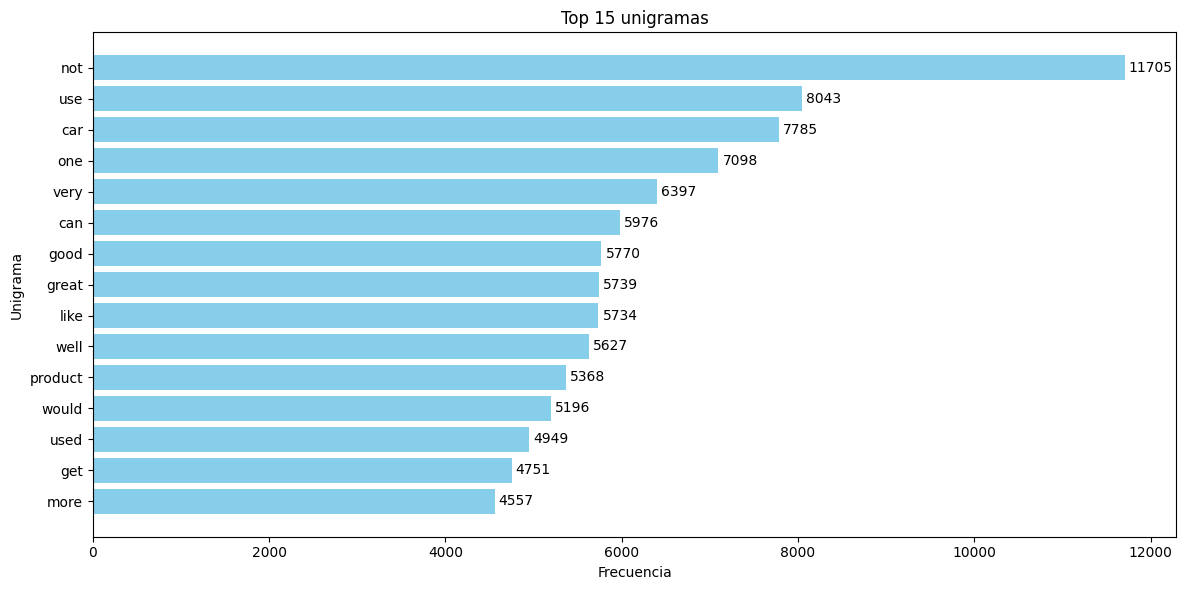

In [353]:
# vamos a definir una función que nos ayude a extraer los n-gramas más fecuentes
def get_ngrams(text_list, n=1, top_n=15):

    all_ngrams = []

    for text in text_list:
        #Quitemos espacios adelante y al final
        text = text.strip()

        # Tokenizamos después de pasar a minúsculas
        tokens = word_tokenize(text.lower())

        # Filtramos los tokens dejando las palabras (solo letras el alfabeto) y eliminando las stop_words
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

        if len(tokens) >= n:
            # Generamos los n-gramas
            ngrams = list(nltk.ngrams(tokens, n))
            all_ngrams.extend([' '.join(ngram) for ngram in ngrams])

    # La tupla esta compuesta por: (el n-grama, frecuencia con la que aparece el n-grama en el texto)
    top_ngrams = pd.Series(all_ngrams).value_counts().head(top_n)
    top_ngrams_list = list(zip(top_ngrams.index, top_ngrams.values))

    return top_ngrams_list

top15_unigrams = get_ngrams(df_to_work['reviewText'], n=1)
print("\nTop 15 unigramas:")
print(top15_unigrams)

top15_unigrams_sorted = top15_unigrams[::-1]

words = [word for word, count in top15_unigrams_sorted]
counts = [count for word, count in top15_unigrams_sorted]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(words, counts, color='skyblue')
# Agrega las etiquetas de cantidad automáticamente
ax.bar_label(bars, fmt='%d', padding=3)
ax.set_title('Top 15 unigramas')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Unigrama')
plt.tight_layout()
plt.show()


Podemos observar las 15 palabras más frecuentes en nuestro corpus.

Podemos confirmar que ha sido una buena elección dejar palabras como 'not' o 'very'. Son palabras que considero son muy importantes para el análisis de sentimiento.

También observamos palabras que nos ayudaran como es el caso de 'good', 'like', 'great
' o 'well'.




Top 15 bigramas:
[('works great', 826), ('very well', 703), ('make sure', 620), ('easy install', 593), ('highly recommend', 530), ('easy use', 518), ('well made', 515), ('works well', 513), ('would recommend', 492), ('very good', 478), ('very easy', 463), ('can not', 427), ('much better', 421), ('not sure', 388), ('great product', 388)]


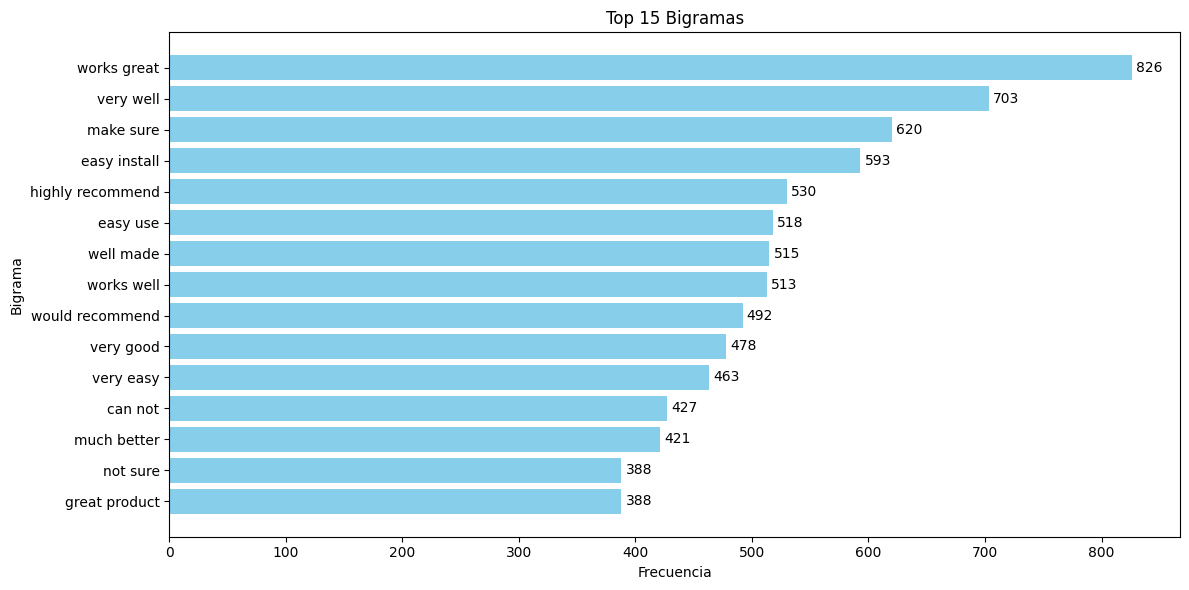

In [354]:

top15_bigrams = get_ngrams(df_to_work['reviewText'], n=2)
print("\nTop 15 bigramas:")
print(top15_bigrams)

top15_bigrams_sorted = top15_bigrams[::-1]

words = [word for word, count in top15_bigrams_sorted]
counts = [count for word, count in top15_bigrams_sorted]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(words, counts, color='skyblue')
# Agrega las etiquetas de cantidad automáticamente
ax.bar_label(bars, fmt='%d', padding=3)
ax.set_title('Top 15 Bigramas')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Bigrama')
plt.tight_layout()
plt.show()


Con los Bigramas podemos observar que los dos primeros tienen una connotación positiva, por eso vemos tantas reseñas positivas.

En varios Bigramas aparece easy, podemos deducir que también tiene connotación positiva, dado que habla de lo fácil que es usarlo o intalarlo. De igual manera podemos ver la palabras "recommmend" con connotación positiva.

En cuanto a la connotación negativa observamos "can not" o "not sure".

En este segundo gráfico podemos observar que al unir 2 palabras ya no tiene tanta frecuencia la palabra 'not' como en el aterior.

Continuo reforzando que ha sido un acierto quitar ciertas palabras de la lista predefinida de stop-words.




Top 15 trigramas:
[('works very well', 131), ('check engine light', 112), ('very well made', 108), ('last long time', 105), ('very easy install', 103), ('auto parts store', 87), ('would highly recommend', 83), ('very easy use', 79), ('highly recommend product', 79), ('ca go wrong', 78), ('get job done', 75), ('would recommend anyone', 67), ('goes long way', 66), ('work very well', 66), ('worked very well', 61)]


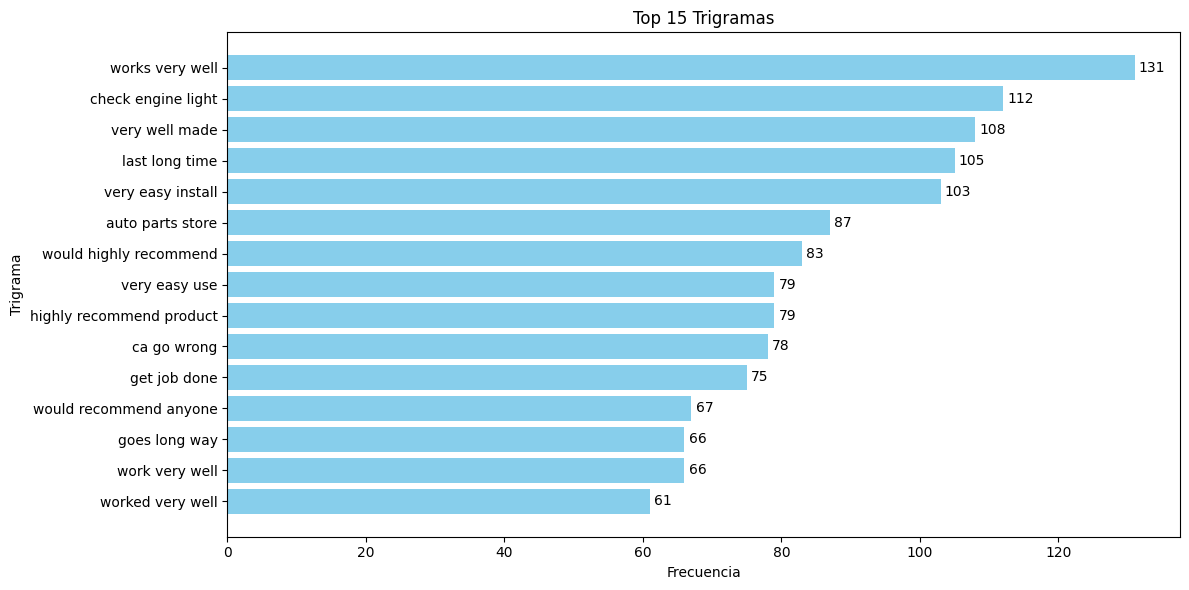

In [355]:

top15_trigrams = get_ngrams(df_to_work['reviewText'], n=3)
print("\nTop 15 trigramas:")
print(top15_trigrams)

top15_trigrams_sorted = top15_trigrams[::-1]

words = [word for word, count in top15_trigrams_sorted]
counts = [count for word, count in top15_trigrams_sorted]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(words, counts, color='skyblue')
# Agrega las etiquetas de cantidad automáticamente
ax.bar_label(bars, fmt='%d', padding=3)
ax.set_title('Top 15 Trigramas')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Trigrama')
plt.tight_layout()
plt.show()

El más frecuente es "works very well" nos refuerza el desequilibrio hacia la clase 'Positiva'.

Podemos observar que se enfocan en la calidad o durabilidad del producto por trigramas como "very well made", "last long time" o "goes long way".

En cuanto a conotación negativa podemos obserar "check engine light", esto sugiere problemas con el automóvil, también esta "ca go wrong".

Como observamos la existencia de "very" reafirmamos que no puede ser una stop-words.

Viendo el trigrama "ca go wrong", podria pensar que existan: "ca" + "n't".
Podria realizar algo en la tokenización para agruparlos, dado que por default un 'can't' lo va a dividir por ejemplo en 'can' + 't'.

Revisando la lista de stop-words observamos que una de ellas es 't', así que debo quitarla de las stop-word y más adelante trabajar en el preprocesamiento con can't para que no los divida y poder darle un valor más real.


In [360]:
# agremos "t"
no_stop_words.append("t")

In [361]:
# Elimina las palabras que no queremos que sean stop-words de la lista de stop-words
for word in no_stop_words:
    if word in stop_words: # Verifica si la palabra está en la lista antes de intentar removerla
        stop_words.remove(word)

print(f"Stopwords originales: {len(stopwords.words('english'))}")
print(f"Stopwords después de quitar negaciones (ejemplo): {len(stop_words)}")

Stopwords originales: 198
Stopwords después de quitar negaciones (ejemplo): 151


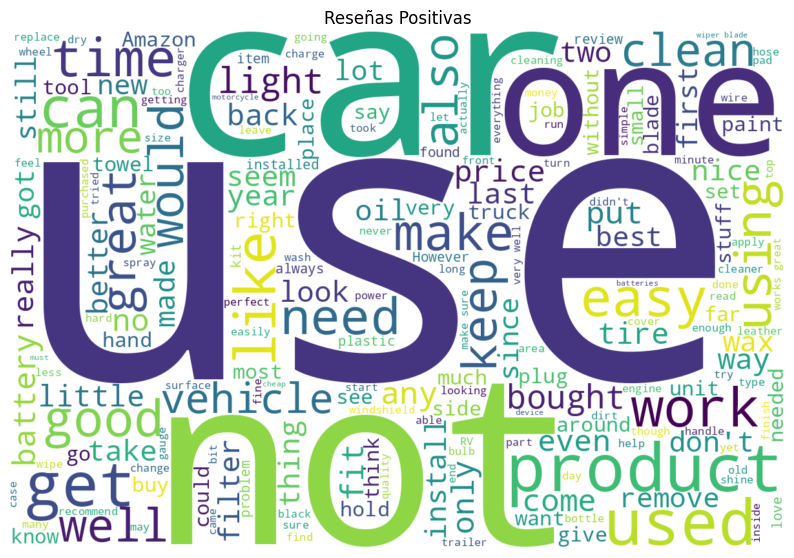

In [364]:
# Filtramos para quedarnos solo con los de sentimiento positivo
positive_reviews_text = " ".join(df_to_work[df_to_work['sentiment'] == 'positive']['reviewText'])

#quitamos las word-stop, y con el texto limpio generamos la nube de palabras.
wordcloud_pos = WordCloud(width=1200, height=800, background_color='white', stopwords=stop_words).generate(positive_reviews_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Reseñas Positivas')
plt.show()


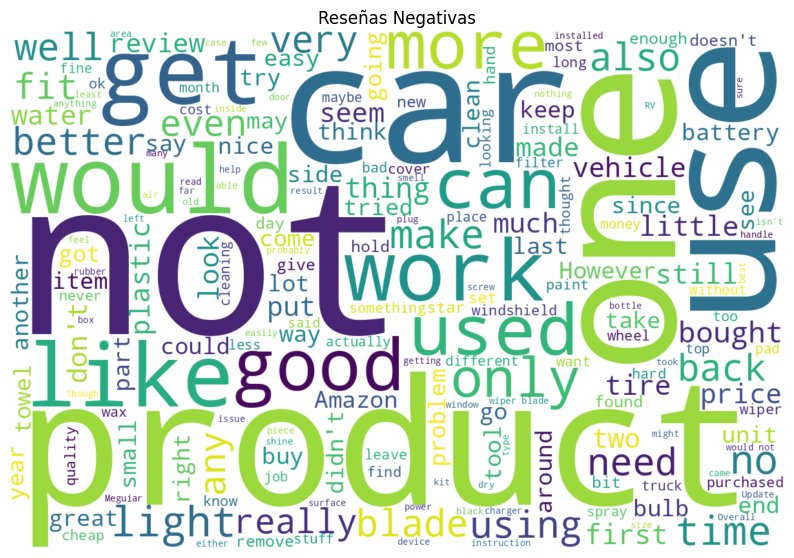

In [365]:
# Filtramos para quedarnos solo con los de sentimiento negativo
negative_reviews_text = " ".join(df_to_work[df_to_work['sentiment'] == 'negative']['reviewText'])
wordcloud_neg = WordCloud(width=1200, height=800, background_color='white', stopwords=stop_words).generate(negative_reviews_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Reseñas Negativas')
plt.show()

Vemos que existen palabras que quitamos de las stop-words que son muy frecuentes en cada clase, estas palabras van relacionadas con el sentimiento .

Vemos que son indispensables los n-gramas porque las palabras por separado son útiles pero cuando estan combinada con otras es donde podemos observar su verdadero valor.

Podemos observar que palabras como "one", "use", "product", "can" o "not" aparecen con mucha frecuencia y dominan visualmente ambas imágenes, pero no creo conveniente eliminarlas porque pueden aportar un mayor sentido al momento de realizar los n-gramas.

In [366]:
# Verifiquemos en donde exiten posibles contracciones con caracter negativo

if "doesn" in all_words:
    print("Existe 'doesn'")
else:
    print("No existe 'doesn'")

if "aren" in all_words:
    print("Existe 'aren'")
else:
    print("No existe 'aren'")

if "didn" in all_words:
    print("Existe 'didn'")
else:
    print("No existe 'didn'")

if "couldn" in all_words:
    print("Existe 'couldn'")
else:
    print("No existe 'couldn'")

if "hadn" in all_words:
    print("Existe 'hadn'")
else:
    print("No existe 'hadn'")

if "hasn" in all_words:
    print("Existe 'hasn'")
else:
    print("No existe 'hasn'")

if "isn" in all_words:
    print("Existe 'isn'")
else:
    print("No existe 'isn'")

if "mightn" in all_words:
    print("Existe 'mightn'")
else:
    print("No existe 'mightn'")

if "mustn" in all_words:
    print("Existe 'mustn'")
else:
    print("No existe 'mustn'")

if "needn" in all_words:
    print("Existe 'needn'")
else:
    print("No existe 'needn'")

if "shan" in all_words:
    print("Existe 'shan'")
else:
    print("No existe 'shan'")

if "shouldn" in all_words:
    print("Existe 'shouldn'")
else:
    print("No existe 'shouldn'")

if "wasn" in all_words:
    print("Existe 'wasn'")
else:
    print("No existe 'wasn'")

if "weren" in all_words:
    print("Existe 'weren'")
else:
    print("No existe 'weren'")

if "wouldn" in all_words:
    print("Existe 'wouldn'")
else:
    print("No existe 'wouldn'")


Existe 'doesn'
Existe 'aren'
Existe 'didn'
Existe 'couldn'
No existe 'hadn'
No existe 'hasn'
Existe 'isn'
No existe 'mightn'
No existe 'mustn'
No existe 'needn'
No existe 'shan'
Existe 'shouldn'
Existe 'wasn'
No existe 'weren'
Existe 'wouldn'


In [367]:
# Necesitamos considerar los casos donde altokenizar palabras en situación negativa se dividan (constracciones)
# Por ejemplo "can't" en "can" y "'t" o "can" y "t"

def match_contractions(tokens):

    match_tokens = []
    i = 0

    while i < len(tokens):
        current_token = tokens[i]

        # Caso de 'n't'
        if current_token == "n't" and i > 0:
            # Juntemos el token anterior con "n't"
            # Obtenemos el token anterior
            prev_token = match_tokens.pop()
            if prev_token.lower() == 'ca':
                match_tokens.append("can't")
            elif prev_token.lower() == 'wo':
                match_tokens.append("won't")
            elif prev_token.lower() == 'sha':
                match_tokens.append("shan't")
            else:
                match_tokens.append(prev_token + "n't")
            i += 1
            continue

        # Caso con "'t" o "t"
        if (current_token == "'t" or current_token == "t") and i > 0:
          prev_token = match_tokens.pop()
          if prev_token.lower() == 'doesn':
                 match_tokens.append("doesn't")
          elif prev_token.lower() == 'aren':
              match_tokens.append("aren't")
          elif prev_token.lower() == 'didn':
              match_tokens.append("didn't")
          elif prev_token.lower() == 'couldn':
              match_tokens.append("couldn't")
          elif prev_token.lower() == 'isn':
              match_tokens.append("isn't")
          elif prev_token.lower() == 'shouldn':
              match_tokens.append("shouldn't")
          elif prev_token.lower() == 'wasn':
              match_tokens.append("wasn't")
          elif prev_token.lower() == 'wouldn':
                match_tokens.append("wouldn't")
          i += 1
          continue

        # Caso específico de 'can not' para que no los tokenice por separados
        if current_token.lower() == 'can' and i + 1 < len(tokens) and tokens[i+1].lower() == 'not':
            match_tokens.append('cannot')
            i += 2 # Avanza dos tokens por el 'not'
            continue

        match_tokens.append(current_token)
        i += 1

    return match_tokens

In [368]:
def cleaning_review(review_text):

  review_text = str(review_text).strip() # Asegurar que es string y quitar espacios

  # Tokenizamos, antes pasamos minúsculas
  # usamos word_tokenize porque mantiene los signos de puntación separados de las palabras para luego poder eliminarlos.
  tokens = word_tokenize(review_text.lower())

  # 2. Juntamos contracciones
  tokens = match_contractions(tokens)

  lemmatizer = WordNetLemmatizer()
  clean_tokens = []

  for word in tokens:
    # Esto cambio un poco: Eliminar puntuación y no alfabéticos, pero no quiero quitar los número para pasar a letras con num2word
    # Si es un número, convertirlo a palabra
    if word.isdigit():
        word = num2words(word, lang='en', ordinal=False)

    # Eliminar psignos de puntuación
    if word.isalpha():

        # Lematizar
        word = lemmatizer.lemmatize(word)

        # Quitar stopwords
        if word not in stop_words:
            clean_tokens.append(word)

  return clean_tokens

In [369]:

t = time()

df_to_work.dropna(subset=['reviewText'], inplace=True)

sentences_for_w2v = [cleaning_review(review) for review in df_to_work['reviewText']]

print('Tiempo para limpiar todo: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para limpiar todo: 0.68 mins


In [370]:
# Eliminamos las que esten vacias.
sentences_for_w2v = [s for s in sentences_for_w2v if s]

df_clean = pd.DataFrame({'clean': [' '.join(s) for s in sentences_for_w2v]})
df_clean.shape

(20467, 1)

In [371]:
df_clean.to_csv('./df_clean.csv')

In [372]:
# Contamos el número de cores en el ordenador
cores = multiprocessing.cpu_count()
print(cores)

2


In [373]:
w2v_model = Word2Vec(min_count=5, #Ignora palabras que tengan frecuencia menor a este número, así reducimos el vocabulario y eliminamos palabras raras
                     window=5, #Tamaño de la ventana de contexto, es decir palabras antes y palabras despues del objetivo. Un valor muy alto puedo producir ruido.
                     vector_size=300, #tamaño de nuestro vector de palabras, no ponemos más tamaño porque necesita más recursos
                     alpha=0.25, #Tasa de aprendizaje con la que iniciamos el modelo, cuanto se ajustan los pesos en cada iteración.
                     min_alpha=0.0001, # Mínimo para la tasa de aprendizaje en el modelo
                     negative=20, #para usar Negative sampling, es decir, número de palabras ruidosa. Nos va a yudar a hacer nuestro entrenamiento más efectivo.
                     workers=cores-1)

In [374]:
# Construimos el vocabulario, Word2Vec necesita construir una tabla del vocabulario
t = time()

w2v_model.build_vocab(sentences_for_w2v, progress_per=10000)

print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))
# Reducimos considerablemente nuestro vocabulario de 23,920 a 7,583

Tiempo para construir el vocabulario: 0.01 mins
Vocabulario compuesto por 7583 palabras


In [375]:
# Entrenamos nuestro modelo, le decimos cuantas interacciones (épocas) se harán sobre el corpus

t = time()

w2v_model.train(sentences_for_w2v, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)


print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.92 mins



Palabras clave a visualizar (existentes en el vocabulario del modelo): ['quality', 'install', 'good', 'not', 'car']


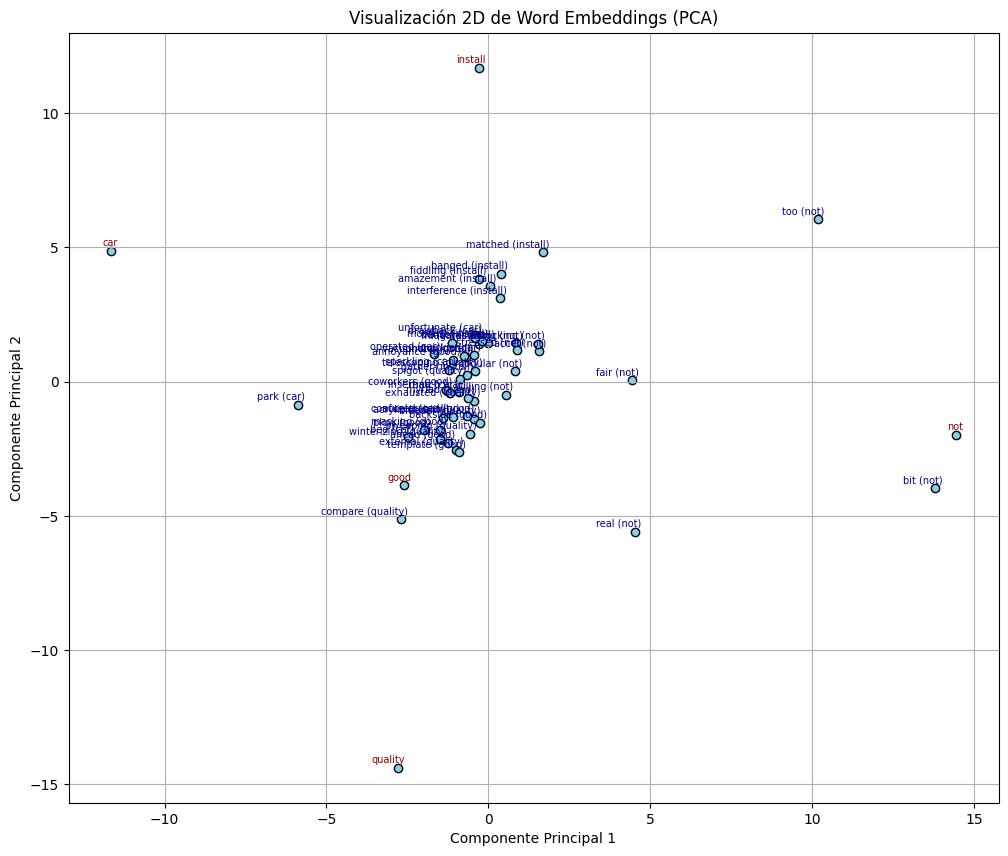

In [376]:
# Lista de palabras clave que queremos visualizar
words_to_visualize = ['quality', 'install', 'good', 'not', 'car']

# Filtramos las palabras existen en el vocabulario del modelo Word2Vec
existing_words = [word for word in words_to_visualize if word in w2v_model.wv]
print(f"\nPalabras clave a visualizar (existentes en el vocabulario del modelo): {existing_words}")

if len(existing_words) > 0:

    all_words_for_plot = [] # Lista que almacenará todas las palabras a graficar (palabras clave + similares)
    word_vectors = [] # Lista para guardar los vectores de cada palabra a graficar
    word_labels = [] # Lista para las etiquetas que se mostrarán en el gráfico

    for word in existing_words:

        all_words_for_plot.append(word)
        word_vectors.append(w2v_model.wv[word])
        word_labels.append(word)
        # Obtenemos las 10 palabras más similares a la palabra clave usando el modelo Word2Vec
        similar_words = w2v_model.wv.most_similar(word, topn=10)

        #Por cada palabra similar encontrada
        for sim_word, _ in similar_words:

            all_words_for_plot.append(sim_word) # Añadimos la palabra similar a la lista de palabras a graficar
            word_vectors.append(w2v_model.wv[sim_word])
            word_labels.append(f"{sim_word} ({word})")

    word_vectors = np.array(word_vectors)

    # Reducimos la dimensionalidad de los vectores a 2D usando PCA para poder graficarlos
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(12, 10))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c='skyblue')

     # Vamos a añadir una etiqueta a cada punto del gráfico
    for i, word in enumerate(all_words_for_plot):

        plt.annotate(word_labels[i], xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                     xytext=(5, 2), textcoords='offset points', ha='right', va='bottom',
                     fontsize=7, color='darkred' if word in existing_words else 'darkblue')

    plt.title('Visualización 2D de Word Embeddings (PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.show()

else:
    print("Ninguna de las palabras clave seleccionadas se encontró en el vocabulario de Word2Vec. Ajusta las palabras o el parámetro min_count.")

De nuestra palabras ['quality', 'install', 'good', 'not', 'car'], podemos observar:

- 'install' se encuentra en la parte superior del cluster más denso.
- 'good' y 'not' parece que se encuentran ubicadas en lados opuestas del cluster principal ('good' a la derecha y 'not' a la izquierda). Esto es una buena señal porque parece que estan separadas por polaridad.
- 'car' se encuentran del lado izquierdo del cluster más denso y 'quality' en la parte baja.

Vamos a ver más de cerca el cluster principal.

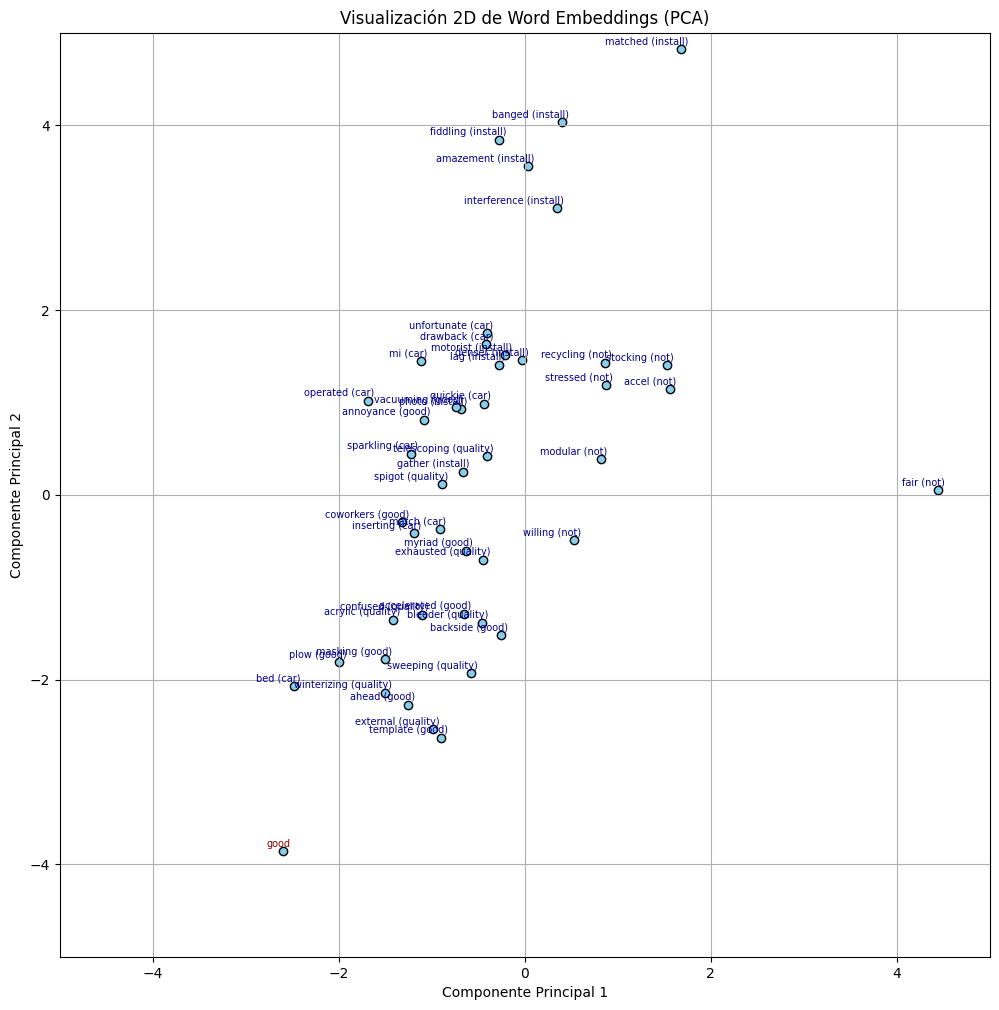

In [377]:
# Va reducir nuestra gráfica
plt.figure(figsize=(12, 12))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c='skyblue')
 # Vamos a añadir una etiqueta a cada punto del gráfico
for i, word in enumerate(all_words_for_plot):

    plt.annotate(word_labels[i], xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                 xytext=(5, 2), textcoords='offset points', ha='right', va='bottom',
                 fontsize=7, color='darkred' if word in existing_words else 'darkblue')

plt.title('Visualización 2D de Word Embeddings (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


Para 'quality' rodeado por ejemplo de 'compare', 'external', 'vinterizing', 'acrylic', 'sweeping', etc., parece que el modelo ha capturado la semántica de la calidad del producto.

Para 'car' rodeado de 'park', 'operated', 'mi', 'sparkling', 'bed', etc. podría relacionarse con las característica del producto.

Para 'good' rodeado de 'template', 'ahead', 'backside', 'myriad', 'coworkers', etc. nos dice que es utilizado para contextos de las características físicas.

Para 'not' sus vecinos son 'too', 'bit', 'real', 'fair', 'fail', 'accel', etc., nos indica que el modelo esta relacionando la palabra con problemas, fallas o dificultadas.

Para 'install' vemos palabras como 'matched', 'banged', 'fidding', 'amazement, 'interference', que podría estar hablandonos de problemas con el proceso de instalación o sus caraterísticas.

Con todo lo anterior parece que nuestro modelo Word2Vec esta siendo efectivo. Parece que esta aprendiendo representaciones significativas y coherentes.

Como vemos una relación muy fuerte entre 'car', 'quality' e 'install' diria que la calidad del vehículo e instalación son puntos importantes. También se interponen con 'good' esto se debe a la gran cantidad de reseñas positivas que tenemos

In [378]:
# Gráfica de embeddings para un conjunto de palabras
def plot_word_embeddings(model, words_to_visualize, topn=10, title="Visualización 2D de Word Embeddings"):

    word_vectors = []
    word_labels = []
    word_colors = []

    # Vocabulario del modelo
    model_vocabulary = set(model.wv.key_to_index.keys())

    for word in words_to_visualize:
        if word in model_vocabulary:
            # Añadir la palabra clave (en rojo)
            word_vectors.append(model.wv[word])
            word_labels.append(word)
            word_colors.append('red')

            # Obtener y añadir las palabras más similares (en azul)
            similar_words = model.wv.most_similar(word, topn=topn)
            for sim_word, _ in similar_words:
                if sim_word in model_vocabulary:
                    word_vectors.append(model.wv[sim_word])
                    word_labels.append(sim_word)
                    word_colors.append('blue')
                else:
                    # Vamos a imprimir palabras similares que son OOV
                    print(f"Advertencia: '{sim_word}' (similar a '{word}') no está en el vocabulario del modelo.")
                    pass
        else:
            print(f"La palabra clave '{word}' no está en el vocabulario del modelo y será omitida.")

    if not word_vectors:
        print("No hay suficientes palabras para visualizar después de filtrar por vocabulario.")
        return

    word_vectors = np.array(word_vectors)

    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(word_vectors)

    # Crear el gráfico
    plt.figure(figsize=(12, 10))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=word_colors, alpha=0.7, edgecolors='k')


    for i, word_label in enumerate(word_labels):
        color = 'red' if word_colors[i] == 'red' else 'blue'

        plt.annotate(word_label,
                     xy=(vectors_2d[i, 0], vectors_2d[i, 1]),
                     xytext=(5, 2), # Desplazamiento del texto
                     textcoords='offset points',
                     ha='right' if vectors_2d[i, 0] < 0 else 'left', # Ajuste de posición para evitar superposición
                     va='bottom' if vectors_2d[i, 1] < 0 else 'top',
                     fontsize=9, # Ajusta el tamaño de la fuente si hay superposición
                     color=color)

    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-15, 15)
    plt.show()



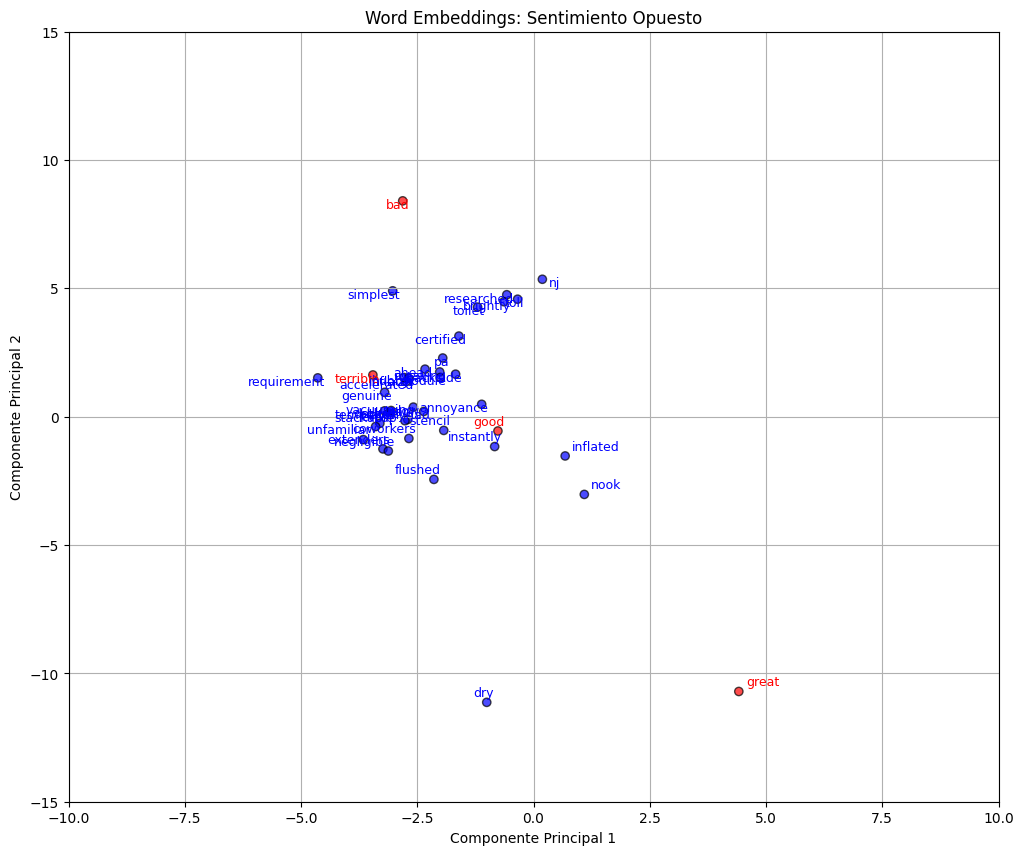

In [379]:
# HAgamos algunas pruebas

# Palabras de sentimiento opuestas
sentiment_words = ['good', 'bad', 'great', 'terrible']
plot_word_embeddings(w2v_model, sentiment_words, topn=10, title="Word Embeddings: Sentimiento Opuesto")


Se vuelve a observar la separación entre los polos opuestos para positivo y negativo. Podemos cerciorar que realmente nuestro modelo esta aprendiendo a diferenciar ls palabras con sentimiento positivo y negativo.


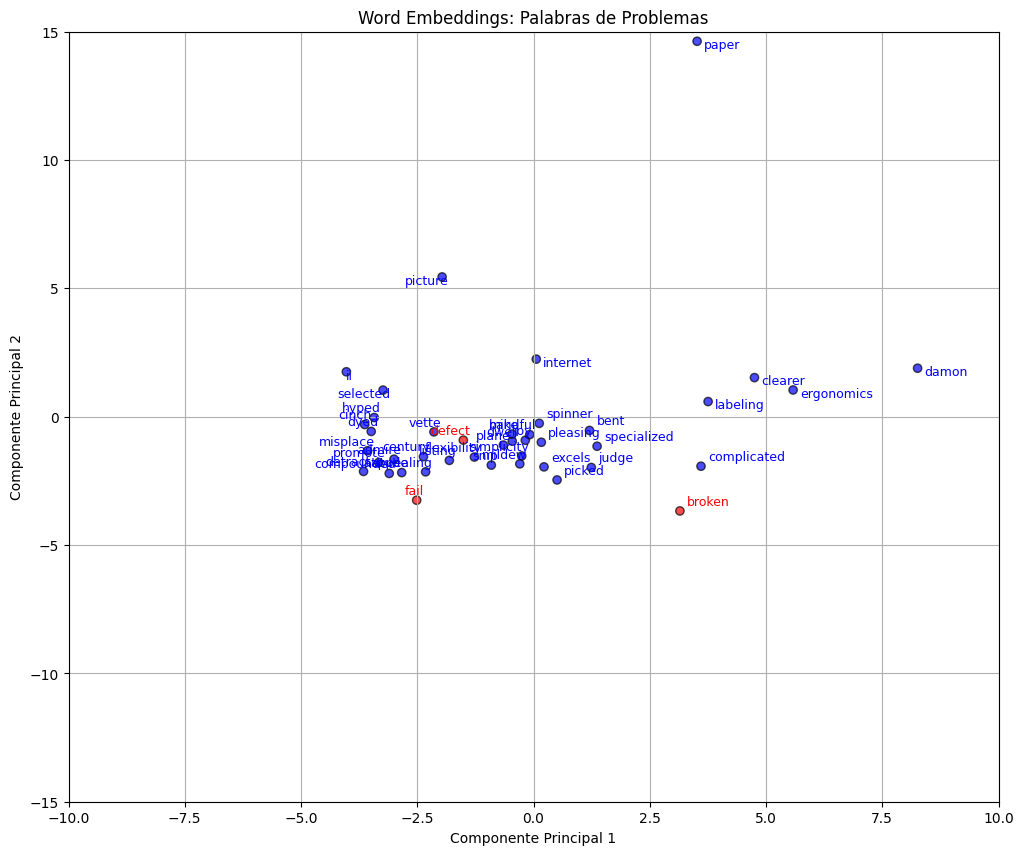

In [380]:
# Palabras relacionadas con problemas
problem_words = ['problem', 'defect', 'broken', 'fail']
plot_word_embeddings(w2v_model, problem_words, topn=10, title="Word Embeddings: Palabras de Problemas")

Parece que nuestro modelo ha aprendido a relacionar bien los problemas y fallos.

In [381]:
# Necesitamos ver cuantas palabras fuera del vocabulario tenemos
oov_words = []

for review_tokens in sentences_for_w2v:

    for word in review_tokens:
        # Verificamos si la palabra no está en el vocabulario del modelo Word2Vec
        if word not in w2v_model.wv:
            oov_words.append(word)

# Contar las palabras OOV
oov_counts = Counter(oov_words)


print(f"\nNúmero total de reseñas: {len(sentences_for_w2v)}")

print(f"\nNúmero total de palabras OOV encontradas: {len(oov_words)}")
print(f"Número de palabras OOV únicas: {len(oov_counts)}")

for word, count in oov_counts.most_common(50):
     print(f"  {word}: {count}")


Número total de reseñas: 20467

Número total de palabras OOV encontradas: 21325
Número de palabras OOV únicas: 13624
  lunch: 4
  weighty: 4
  paddle: 4
  lumber: 4
  misfiring: 4
  utterly: 4
  lowe: 4
  eyesore: 4
  masterlock: 4
  disperse: 4
  raindrop: 4
  unevenly: 4
  slowing: 4
  telephone: 4
  invent: 4
  stole: 4
  illustrate: 4
  quits: 4
  wort: 4
  introduce: 4
  thickest: 4
  obsessed: 4
  afterwords: 4
  evaporation: 4
  acted: 4
  unfolded: 4
  blasted: 4
  interchangeable: 4
  chilly: 4
  acquire: 4
  airaid: 4
  boosting: 4
  ecstatic: 4
  unclip: 4
  surrounded: 4
  seed: 4
  ghost: 4
  thud: 4
  nuclear: 4
  fountain: 4
  youth: 4
  rival: 4
  selector: 4
  flower: 4
  ranch: 4
  reddish: 4
  challenger: 4
  damping: 4
  tinny: 4
  dampened: 4


Podemos observar que tenemos un número muy significativo de palabras OOV, casí la mitad delas palabras que aparecen en el corpus no estan en vocabulario.

Como podemos ver nuestro parametro de 'min_count¡ = 5 esta funcionando dado que las frecuencias más altas de OOv es 4. Creo que este valor es razonable. Por esto podria trabajar con FastText o disminiur el valor de 'min_count' si no obtengo los resultados esperados.

In [382]:
# Vamos a ver la longitud de las reseñas
#calculamos la longitud para cada reseña
review_lengths = [len(review_tokens) for review_tokens in sentences_for_w2v]

#Necesitamos pasarlo a pandas para poder hacer calculos estadísticos
review_lengths_series = pd.Series(review_lengths)

print(review_lengths_series.describe())

count    20467.000000
mean        44.334587
std         51.702479
min          1.000000
25%         16.000000
50%         27.000000
75%         51.000000
max       1319.000000
dtype: float64


De 20,467 reseñas, observamos que de:
  - Media tiene 44.34 tokens (palabras)
  - Mínimo algunas tienen solo 1 token (podrían ser un "good" o "terrible")
  - Máximo tienen 1,319 tokens.

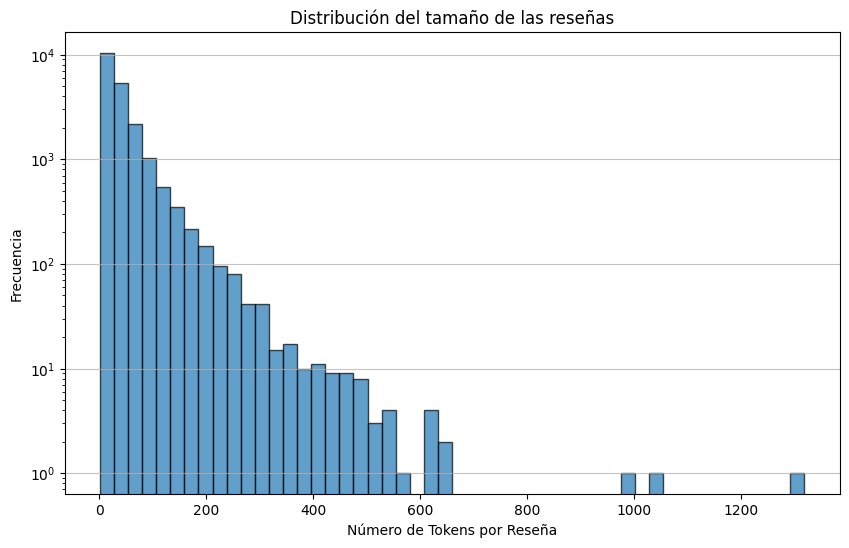

In [383]:
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, edgecolor='black', alpha=0.7) # Puedes ajustar el número de bins
plt.title('Distribución del tamaño de las reseñas')
plt.xlabel('Número de Tokens por Reseña')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()

Podemo ver que la gran mayoría de las reseñas son cortas pero también observamos algunas reseñas muy largas.

Es probable que tenga que realizar un padding para rellenar reseñas cortas o cortar las largas.

**Resumen**

-  Dimensiones del Dataset: El dataset contiene 20,473 reseñas.

-  Distribución de Estrellas (Puntos): Podemos observar que existen muchisimas reseñas altamente positivas, la mayoria de 5 estrellas.
  
  * Podemos ver un desequilibrio entre las clases 'Positiva' (4 y 5) y las negativas (1, 2 y 3).

-  Ditribución del Sentimiento: "positivo" son 4-5 estrellas y "negativo" son 1-3 estrellas.
  
  * La distribución de clases es: Positivo: 17, 895                        reseñas y Negativo: 2,578 reseñas.  Mostrando un desequilibrio muy fuerte.
  * 12.6% Clase 'Negativa' y 87.4% Clase 'Positiva'

-  Cardinalidad del Vocabulario: El corpus de reseñas tiene una cardinalidad de vocabulario de 23,921 palabras únicas (después de una limpieza básica).

-  N-grams Frecuentes:
    * Los unigramas más comunes (palabras individuales) como 'product', 'car', 'easy', 'great', 'time' sugieren temas el producto, su facilidad de uso o la experiencia general.
    * Mientras que los bigramas y trigramas  como 'easy to install', 'works great', 'good quality' son muy valiosos porque capturan frases y expresiones que parecen demostrar un sentimiento específico.

-  Nubes de Palabras: Al comparar ambas nubes, podemos identificar rápidamente palabras clave distintivas asociadas con cada polaridad ('positiva' y 'negativa').

  * Confirmando la necesidad de eliminar palabras de la lista de stopwords.

-  Word Embeddings (Word2Vec): Podemos observar cómo el modelo ha capturado bien relaciones semánticas entre las palabras. Con un vocabulario de 7,583 palabras.

-  OOV: tenemos 20,473 palabras únicas fuera del vocabulario. Es un número significativo con pocas frecuencias cada una.

- Longitud de reseñas: La mayoria de las reseñas son cortas pero su distribución nos muestra una cola larga de reseñas muy extensas.


# Etapa de preprocesado de texto

Necesitamos definir claramente una función para el preprocesado de reviews.

In [384]:
def complete_stop_word():

  stop_words = set(stopwords.words('english'))

  no_stop_words = ["not", "no", "nor", "don't", "doesn't", "doesn", "didn't", "didn", "aren't", "aren", "couldn't", "couldn",
                  "hadn't", "hadn", "hasn't", "hasn", "haven't", "isn't", "isn", "mightn't", "mightn", "mustn't", "mustn",
                  "needn't", "needn", "shan't",  "shan", "shouldn't", "shouldn", "wasn't", "wasn", "weren't", "weren",
                  "won't", "wouldn't", "wouldn", "very", "any", "few", "more", "most", "against", "can", "further", "only",
                  "too", "needn't", "t", "'t"]

  for word in no_stop_words:
    if word in stop_words: # Verifica si la palabra está en la lista antes de intentar removerla
        stop_words.remove(word)

  return stop_words

In [385]:
def match_contractions_final(tokens):

    match_tokens = []
    i = 0

    while i < len(tokens):
        current_token = tokens[i]

        # Caso de 'n't'
        if current_token == "n't" and i > 0:
            # Juntemos el token anterior con "n't"
            # Obtenemos el token anterior
            prev_token = match_tokens.pop()
            if prev_token.lower() == 'ca':
                match_tokens.append("can't")
            elif prev_token.lower() == 'wo':
                match_tokens.append("won't")
            elif prev_token.lower() == 'sha':
                match_tokens.append("shan't")
            else:
                match_tokens.append(prev_token + "n't")
            i += 1
            continue

        # Caso con "'t" o "t"
        if (current_token == "'t" or current_token == "t") and i > 0:
          prev_token = match_tokens.pop()
          if prev_token.lower() == 'doesn':
                 match_tokens.append("doesn't")
          elif prev_token.lower() == 'aren':
              match_tokens.append("aren't")
          elif prev_token.lower() == 'didn':
              match_tokens.append("didn't")
          elif prev_token.lower() == 'couldn':
              match_tokens.append("couldn't")
          elif prev_token.lower() == 'isn':
              match_tokens.append("isn't")
          elif prev_token.lower() == 'shouldn':
              match_tokens.append("shouldn't")
          elif prev_token.lower() == 'wasn':
              match_tokens.append("wasn't")
          elif prev_token.lower() == 'wouldn':
                match_tokens.append("wouldn't")
          i += 1
          continue

        # Caso específico de 'can not' para que no los tokenice por separados
        if current_token.lower() == 'can' and i + 1 < len(tokens) and tokens[i+1].lower() == 'not':
            match_tokens.append('cannot')
            i += 2 # Avanza dos tokens por el 'not'
            continue

        match_tokens.append(current_token)
        i += 1

    return match_tokens

In [386]:
def tokenize_and_remove_url(text):

  review_text = str(text).strip()

  review_text =  review_text.lower()

  review_text = re.sub(r'http\S+|www\S+', '', review_text) # Eliminamos URLs

  review_text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', review_text) # Eliminar emails

  tokens = word_tokenize(review_text)

  tokens = match_contractions_final(tokens)

  return tokens

In [387]:
# Inicializar el corrector una sola vez
spell = SpellChecker(language='en')

In [388]:
def correct_spelling(word):
    # Solo intentar corregir palabras alfabéticas
    if word.isalpha():
        # `correction` devuelve la corrección más probable, o la palabra original si no hay sugerencias
        corrected_word = spell.correction(word)
        return corrected_word if corrected_word is not None else word
    return word

In [389]:
def cleaning_review_final(review_text):

  # Vamos a eliminar todos los registros que tengan valores nulos o nan en la columna de review.
  review_text.dropna(subset=['reviewText'], inplace=True)

  stop_words = complete_stop_word()
  lemmatizer = WordNetLemmatizer()
  clean_tokens = []

  tokens = tokenize_and_remove_url(review_text)

  for word in tokens:
    # Esto cambio un poco: Eliminar puntuación y no alfabéticos, pero no quiero quitar los número para pasar a letras con num2word
    # Si es un número, convertirlo a palabra
    if word.isdigit():
        word = num2words(word, lang='en', ordinal=False)

    # Eliminar psignos de puntuación
    word_clean = word.translate(str.maketrans('', '', string.punctuation))

    if word.isalpha():

        # Corregir la ortografía
        corrected_word = correct_spelling(word_clean)

        # Lematizar
        word_lemmatized = lemmatizer.lemmatize(corrected_word)

        # Quitar stopwords
        if word not in stop_words:
            clean_tokens.append(word_lemmatized)

  return clean_tokens

# Etapa de entrenamiento y testeo de un  modelo de análisis de sentimiento

In [390]:
file = 'reviews_Automotive_5.json'

In [391]:
def resturn_automovil_reviews_overall(file_path ):

    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))

    df = pd.DataFrame(data)

    # Vamos a crear un nuevo dataframe con las columnas 'reviewText'  y 'overall'
    df_to_work = df[['reviewText', 'overall']].copy()

    return df_to_work

In [392]:
df_final = resturn_automovil_reviews_overall(file)

In [393]:
df_final.head(5)

,reviewText,overall
0,I needed a set of jumper cables for my new car...,5.0
1,"These long cables work fine for my truck, but ...",4.0
2,Can't comment much on these since they have no...,5.0
3,I absolutley love Amazon!!! For the price of ...,5.0
4,I purchased the 12' feet long cable set and th...,5.0


In [394]:
# Creamos una columna nueva donde guardaremos la lista de tokens limpios
df_final['processed_review'] = df_final['reviewText'].apply(lambda x: cleaning_review(x))

df_final.head(5)

,reviewText,overall,processed_review
0,I needed a set of jumper cables for my new car...,5.0,"[needed, set, jumper, cable, new, car, good, r..."
1,"These long cables work fine for my truck, but ...",4.0,"[long, cable, work, fine, truck, quality, seem..."
2,Can't comment much on these since they have no...,5.0,"[comment, much, since, not, yet, used, come, b..."
3,I absolutley love Amazon!!! For the price of ...,5.0,"[absolutley, love, amazon, price, set, cheap, ..."
4,I purchased the 12' feet long cable set and th...,5.0,"[purchased, twelve, foot, long, cable, set, ar..."


In [395]:
# Convertir la lista de tokens a una cadena de texto para TfidfVectorizer
# Crearemos otra columna para guardar las cadenas.
df_final['processed_review_str'] = df_final['processed_review'].apply(lambda x: ' '.join(x))
df_final.head(5)

,reviewText,overall,processed_review,processed_review_str
0,I needed a set of jumper cables for my new car...,5.0,"[needed, set, jumper, cable, new, car, good, r...",needed set jumper cable new car good review go...
1,"These long cables work fine for my truck, but ...",4.0,"[long, cable, work, fine, truck, quality, seem...",long cable work fine truck quality seems littl...
2,Can't comment much on these since they have no...,5.0,"[comment, much, since, not, yet, used, come, b...",comment much since not yet used come back upda...
3,I absolutley love Amazon!!! For the price of ...,5.0,"[absolutley, love, amazon, price, set, cheap, ...",absolutley love amazon price set cheap cable b...
4,I purchased the 12' feet long cable set and th...,5.0,"[purchased, twelve, foot, long, cable, set, ar...",purchased twelve foot long cable set arrived r...


In [396]:
# Vamos a crear una función para dividir nuestras clases de forma binaria
# Positivo: 4 y 5 estrellas
# Negativo: 1, 2 y 3 estrellas
def map_sentiment(stars):
    if stars >= 4:
        return 'Positivo'
    else:
        return 'Negativo'

df_final['sentiment'] = df['overall'].apply(map_sentiment)

print("\nDistribución de Sentimiento Binario:")
print(df_final['sentiment'].value_counts())



Distribución de Sentimiento Binario:
sentiment
Positivo    17895
Negativo     2578
Name: count, dtype: int64


In [397]:
df_final.head(5)

,reviewText,overall,processed_review,processed_review_str,sentiment
0,I needed a set of jumper cables for my new car...,5.0,"[needed, set, jumper, cable, new, car, good, r...",needed set jumper cable new car good review go...,Positivo
1,"These long cables work fine for my truck, but ...",4.0,"[long, cable, work, fine, truck, quality, seem...",long cable work fine truck quality seems littl...,Positivo
2,Can't comment much on these since they have no...,5.0,"[comment, much, since, not, yet, used, come, b...",comment much since not yet used come back upda...,Positivo
3,I absolutley love Amazon!!! For the price of ...,5.0,"[absolutley, love, amazon, price, set, cheap, ...",absolutley love amazon price set cheap cable b...,Positivo
4,I purchased the 12' feet long cable set and th...,5.0,"[purchased, twelve, foot, long, cable, set, ar...",purchased twelve foot long cable set arrived r...,Positivo


In [398]:
# Necesitamos separar los datos
X = df_final['processed_review_str']
y = df_final['sentiment']

In [399]:
# Procedamos a dividir nuestros conjunto de datos para el entrenamiento y testeo

# Stratify para mantener la proporción de clases en ambos conjuntos, así evitamos que alguna de ellas termine con solo clases positivas.
# Pondremos 20% en test y 80% en train
# El random_state lo suamos para segurar la reproducibilidad de la división.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDatos para entrenamiento: {len(X_train)}")
print(f"Datos para testeo: {len(X_test)}")
print(f"Distribución de sentimiento en entrenamiento:\n{y_train.value_counts()}")
print(f"Distribución de sentimiento en testeo:\n{y_test.value_counts()}")


Datos para entrenamiento: 16378
Datos para testeo: 4095
Distribución de sentimiento en entrenamiento:
sentiment
Positivo    14316
Negativo     2062
Name: count, dtype: int64
Distribución de sentimiento en testeo:
sentiment
Positivo    3579
Negativo     516
Name: count, dtype: int64


In [400]:
# Decidi usar TfidfVectorizer porque no solo considera la frecuencia de una palabra en la review, sino que le da menos peso a las palabras que aparecen en muchas reviews.
# Así podemos resaltar palabras que son distintivas entre nuestros sentimientos y penaliza las palabras muy comunes que no nos aportan mucha información como "car", "one"
# También nos ayuda al trbajar con reseñas de longitud variable, y así evitar introducir más ruido.
# Vamos a incluir los n-gramas (unilaterales y bilateras) porque creo que con los bilaterales ya obtenemos bastante significado sin llegar a los trilaterales. Esto lo podemos ampliar en el futuro.
# max_features para controlar el tamaño del vocabulario
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [401]:
# Modelos con los que vamos a entrenar.
# Ambos son modelos muy utilizados y robustos para ser usados en clasificación de texto con BoW (Bag-of-Words)
# Bag-of-Words se utiliza por es más simple y facil de implementar. Representa una colección de palabras, ignorando la gramática y el orden, se enfoca en la frecuencia de las palabras dentro del documento.
models = {
    # Funciona muy bien con características que representan conteos o frecuencias como las usadas en TfidfVectorizer.
    # Es un modelo muy rápido
    # Lo puedo completa con SMOTE para nuestro problema con el desequilibrio de sentimientos.
    "Multinomial Naive Bayes": MultinomialNB(),
    # Es un modelo lineal muy robusto. Clasifica la probabilidad de una isntancia pertenezca a un clase.
    # Tiene un buen rendimiento para pocos datos.
    # solver='liblinear' es bueno para datasets pequeños (como los generados en TfidfVectorizer)
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear')
}

In [402]:
# Devemos crear pipelines que incluyan la vectorización, SMOTE y el clasificador para trabajar con nuestros modelos.
# Usamos ImbPipeline para que SMOTE se aplique correctamente solo al conjunto de entrenamiento
pipelines_models = {}

for name, model in models.items():

    pipelines_models[name] = ImbPipeline([
        # Vectorizamos con TfidfVectorizer, así transformamos los textos en vectores numéricos.
        ('tfidf', tfidf_vectorizer),
        # Usamos SMOTE (Synthetic Minority Over-sampling Technique) para hacer oversampling en el cojunto de de entrenamiento y así equilibrar la cantidad de registros en cada clase.
        # Con esto evitamos que se ignore la clase 'negativa', generando nuevos ejemplo sintéticos.
        # Lo hace tomando ejemplos reales 'negativos' y combinandolos con sus vecinos para crear registros similares pero no identicos.
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])


In [403]:
# Vamos a entrenar y testear ambos modelos
results = {}

for name, pipeline in pipelines_models.items():
    print(f"\nModelo: {name}")
    # Entrenamos el modelo, aquí usamos el pipline completo (vectorización, balanceo y clasificación) con el conjunto de datos de train.
    pipeline.fit(X_train, y_train)
    # Ahora vamos a predecir en test, datos que no se han visto (test).
    # Usa el pipeline entrenado para predecir el sentimiento en test.
    y_pred = pipeline.predict(X_test)

    # Vamos a imprimir las métricas del modelo
    print("\nReporte de Clasificación:")
    # Para la smetricas de precisión, recall y F1
    report = classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo'])
    print(report)

    print("\nMatriz de Confusión:")
    # En ella podemos ver cuantos conjuntos de cada clase han sido correcta o incorrectamente clasificados.
    cm = confusion_matrix(y_test, y_pred)
    # Crear un DataFrame para la matriz de confusión para mejor visualización
    cm_df = pd.DataFrame(cm, index=['Real Negativo', 'Real Positivo'], columns=['Pred Negativo', 'Pred Positivo'])
    print(cm_df)

    # Impirmirmos el accuracy del modelo (porcentaje de predicciones correctas)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    results[name] = {
        'classification_report': report,
        'confusion_matrix': cm_df,
        'accuracy': accuracy,
        'f1_negativo': classification_report(y_test, y_pred, output_dict=True)['Negativo']['f1-score'],
        'f1_positivo': classification_report(y_test, y_pred, output_dict=True)['Positivo']['f1-score'],
        'recall_negativo': classification_report(y_test, y_pred, output_dict=True)['Negativo']['recall'],
        'recall_positivo': classification_report(y_test, y_pred, output_dict=True)['Positivo']['recall'],
        'precision_negativo': classification_report(y_test, y_pred, output_dict=True)['Negativo']['precision'],
        'precision_positivo': classification_report(y_test, y_pred, output_dict=True)['Positivo']['precision']
    }
    print("-" * 80)


Modelo: Multinomial Naive Bayes

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.36      0.72      0.48       516
    Positivo       0.95      0.81      0.88      3579

    accuracy                           0.80      4095
   macro avg       0.65      0.77      0.68      4095
weighted avg       0.88      0.80      0.83      4095


Matriz de Confusión:
               Pred Negativo  Pred Positivo
Real Negativo            374            142
Real Positivo            679           2900

Accuracy: 0.7995
--------------------------------------------------------------------------------

Modelo: Logistic Regression

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.39      0.70      0.50       516
    Positivo       0.95      0.84      0.89      3579

    accuracy                           0.82      4095
   macro avg       0.67      0.77      0.70      4095
weighted avg       0.88      0.8

# Reporte de métricas y conclusiones


**Reporte de Clasificación**

En support podemos validar que son la misma cantidad de muestra que tenía nuestro conjunto de datos de test.

Podemos observar:

- *Accuracy*: Regresión Logística tiene una mayuor precisión general del 82.44%
- *Precisión en la clase 'negativa'*: ambos modelos presentan una precisión baja. De todas las reseñas que los modelos predijerono como negativas, solo el 36% y 39% realmente eran negativas.
- *Recall en la clase 'negativa'*: Multinomial Naive Bayes tiene un recall un poco mayor con 0.72, es decir que pudo identificar un poco más de reviews negativas reales.
- *f1-score de la clase 'negativa'*: Regresión Logística es un poco más grande.
- *Métricas para la clase 'positiva'*: ambos modelos son excelentes para las clase 'positiva'.



**Matriz de Confusión**


*Multinomial Naive Bayes*:

*   Predice 374 Verdaderos Negativos y 2900 Verdaderos Positivos. Prediciones correctas.
*   Tiene 142 Falsos Positivos (positivas predichas como negativas) y 679 Falsos Negativos (negativas predichas como positivas).

*Regresión Logística*:

*   Predice 359 Verdaderos Negativos y 3017 Verdaderos Positivos. Prediciones correctas.
*   Tiene 157 Falsos Positivos y 562 Falsos Negativos.

Vemos que Regresión Logística tiene menos Falsos Negativos que Naive Bayes (562 vs 679), lo cual es mejor para identificar la clase minoritaria.

In [404]:
# Para escoger nuestro mejor modelo me quiero basar en el F1-score porque es una métrica que combina precisión y recall.

best_model = ""
# Necesitamos maximizar el f1-score para la clase minoritaria (negativa), por el desbalanceo que tenemos dentro de nuestras clases
# En este caso nuestra clase 'negativa' es la de mayor interes y la más dificil de predecir.
# Esto nos ayudará a elegir el modelo que mejor identifica correctamente la clase 'negativa', en vez uno que solo acierte en la clase 'positiva' que es mayoría.
# Por eso inicializamos con un valor bajo.
best_f1_neg = -1

for name, res in results.items():
    print(f"\nModelo: {name}")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print(f"  F1-Score (Negativo): {res['f1_negativo']:.4f}")
    print(f"  F1-Score (Positivo): {res['f1_positivo']:.4f}")
    print(f"  Recall (Negativo): {res['recall_negativo']:.4f}")

    # Priorizamos el F1-score de la clase negativa debido al desequilibrio
    # Si el f1-score de la clase negativa del modelo en el que estamos es mayor que el encontrado, actualizamos el mejor modelo
    if res['f1_negativo'] > best_f1_neg:
        best_f1_neg = res['f1_negativo']
        best_model = name

print(f"\n Mejor Modelo: {best_model}")


Modelo: Multinomial Naive Bayes
  Accuracy: 0.7995
  F1-Score (Negativo): 0.4767
  F1-Score (Positivo): 0.8760
  Recall (Negativo): 0.7248

Modelo: Logistic Regression
  Accuracy: 0.8244
  F1-Score (Negativo): 0.4997
  F1-Score (Positivo): 0.8935
  Recall (Negativo): 0.6957

 Mejor Modelo: Logistic Regression


In [405]:
print(f"\n Métricas del mejor modelo: Logistic Regression")
print(f"  Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"\nClase 'Negativa'")
print(f"  F1-Score (Negativo): {results['Logistic Regression']['f1_negativo']:.4f}")
print(f"  Recall (Negativo): {results['Logistic Regression']['recall_negativo']:.4f}")
print(f"  Precision (Negativo): {results['Logistic Regression']['precision_negativo']:.4f}")
print(f"\nClase 'Positiva'")
print(f"  F1-Score (Positivo): {results['Logistic Regression']['f1_positivo']:.4f}")
print(f"  Recall (Positivo): {results['Logistic Regression']['recall_positivo']:.4f}")
print(f"  Precision (Positivo): {results['Logistic Regression']['precision_positivo']:.4f}")


 Métricas del mejor modelo: Logistic Regression
  Accuracy: 0.8244

Clase 'Negativa'
  F1-Score (Negativo): 0.4997
  Recall (Negativo): 0.6957
  Precision (Negativo): 0.3898

Clase 'Positiva'
  F1-Score (Positivo): 0.8935
  Recall (Positivo): 0.8430
  Precision (Positivo): 0.9505


La precisión general es del 82.44%, parece alta pero por el desequilibrio de clases, este métrica por si sola puede ser engañosa.

Las métricas para la clase 'positiva' son muy alto, demostrando que el modelo es muy efectivo y fiable para clasificar reseñas positivas. Esto ya lo esperabamos por la gran cantidad de reviews positivas que tenemos.

Las métricas para la clase 'negativa':

  - La precisión es bastante baja (0.39). Nos dice que el modelo tiende a equivocarse, marcando algunas reviews como 'negativas' cuando no lo son.
  - Recall tiene un valor alto. Nos esta diciendo que el modelo es capaz de identificar el 70% del total de las reviews negativas reales. Esto es muy bueno porque es capaz de detectar la mayoria de quejas reales.
  - F1-score de 0.50, parece un resultado pasable por el desequilibrio que tenemos. Intenta no perder demasiadas y no tener demasiados errores.

In [406]:
print(f"\n Matriz de confusión del mejor modelo: Logistic Regression")
print(results['Logistic Regression']['confusion_matrix'])


 Matriz de confusión del mejor modelo: Logistic Regression
               Pred Negativo  Pred Positivo
Real Negativo            359            157
Real Positivo            562           3017


Contamos con:

*   359 Verdaderos Negativos
*   562 Falsos Negativos
*   3,017 Verdaderos Positivos
*   157 Falsos Positivos

Nos confirma que el modelo es bueno identificando reviews positivas pero le cuesta más con las negativas.



En general podemos observar:

- El desequilibrio que tenemos en nuestras clases sigue siendo un desafio dado que la precisión para la clase 'negativa' es baja y por lo tanto propenso a errores. Lo ideal sería tener más datos de la clase 'negativa'
- Me base en el F1-Score más alto para la clase 'negativa', porque el rendimiento en la clase minoritaria es más importante que la precisión general.- Podemos observar que el Recall de la clase 'negativa' nos dice que el modelo identifica la mayoría (69.57%) de los casos negativos reales.
- Considero que menos Falsos Negativos significa que es mejor para encontrar las reseñas negativas reales.
- En general el modelo es muy eficaz para identificar reseñas positivas y puede detectar una parte significativa de las reseñas negativas.

# Modelo LDA

Vamos a probar con el modelo LDA. La idea es que busque lso temas subyacentes presentes en el corpus. Cada review se considera  una mezcla de varios tópicos. Podremos identificar los temas principales, y en cada review podremos ver que temas tiene.

Puede que sea útil par agenerar características adicionales que nos ayuden a nuestro modelos clasificadores.

In [407]:
# Necesitamos crear un diccionario de todas las palabras únicas
dictionary = corpora.Dictionary(df_final['processed_review'])

In [408]:
# Filtrar tokens para reducir el ruido y mejorar la calidad
# no_below=5 - Ignoraremos palabras que aparecen en menos de 5 documentos
# no_above=0.5 - Ignora las que aparezcan más del 50% de los documentos
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [409]:
# Vamos a crear un corpus (representación de bolsa de palabras para cada documento)
# Es decir, para cada review, la función doc2bow va contar cauntas veces aparece cada palabras del diccionario en ese review
# nos devuelve una lista de tupla (id_palabra, frecuencia), donde id_palabra es el identificador de la palabra en el diccionario.
corpus = [dictionary.doc2bow(review) for review in df_final['processed_review']]

In [410]:
# Vamos a entrenar el modelo
num_topics_to_try = [3, 5, 10] # Diferentes números de tópicos
coherence_scores = {}
perplexity_scores = {}

for num_topics in num_topics_to_try:
    print(f"\nEntrenando LDA con {num_topics} tópicos")

    lda_model = LdaModel(corpus=corpus, # corpus de documentos en formato bag of words
                         id2word=dictionary,#diccionario que mapea los ids de las palabras originales del corpus
                         num_topics=num_topics, #número de temas a encontrar
                         random_state=42,
                         iterations=5, # iteraciones internas por cada review
                         passes=10, # número de vueltas completas sobre el corpus.
                         alpha='auto' # queremos que el modelo ajuste automáticamente el parametro alpha.
                        )

    # Calcular Coherence Score
    # mide la calidad e interpretabilidad de lso temas generados
    # Cuanto más alta produciera temas que son semánticamente interpretables y consistentes. Y es más comprensible.
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df_final['processed_review'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores[num_topics] = coherence_lda

    # Calcular Perplexity
    # Mide que tanbien el modelo se ajusta a los datos
    # Cuanto más bajo indica un mejor ajuste
    perplexity_lda = lda_model.log_perplexity(corpus)
    perplexity_scores[num_topics] = perplexity_lda

    print(f"  Coherence Score C_v: {coherence_lda:.4f}")
    print(f"  Perplexity: {perplexity_scores[num_topics]:.4f}")

    print("Tópicos principales:")
    for idx, topic in lda_model.print_topics(-1):
         print(f"Palabras: {topic}")



Entrenando LDA con 3 tópicos
  Coherence Score C_v: 0.3248
  Perplexity: -7.2540
Tópicos principales:
Palabras: 0.014*"not" + 0.013*"wa" + 0.012*"one" + 0.012*"very" + 0.011*"work" + 0.010*"light" + 0.009*"would" + 0.009*"well" + 0.008*"great" + 0.008*"easy"
Palabras: 0.022*"car" + 0.017*"product" + 0.012*"use" + 0.011*"towel" + 0.011*"not" + 0.010*"like" + 0.009*"wa" + 0.009*"water" + 0.009*"used" + 0.007*"blade"
Palabras: 0.013*"car" + 0.012*"not" + 0.012*"can" + 0.011*"battery" + 0.009*"wa" + 0.008*"use" + 0.008*"one" + 0.007*"ha" + 0.006*"power" + 0.006*"hose"

Entrenando LDA con 5 tópicos
  Coherence Score C_v: 0.3578
  Perplexity: -7.2372
Tópicos principales:
Palabras: 0.017*"very" + 0.015*"not" + 0.015*"work" + 0.014*"well" + 0.013*"wa" + 0.012*"one" + 0.012*"would" + 0.012*"great" + 0.011*"easy" + 0.010*"good"
Palabras: 0.027*"car" + 0.021*"product" + 0.016*"towel" + 0.014*"use" + 0.010*"like" + 0.010*"not" + 0.010*"used" + 0.009*"clean" + 0.009*"water" + 0.009*"leather"
Palab


Resultados de Evaluación LDA
Número de Tópicos:                3 | Coherence Score C_v:         0.3248 | Perplexity:     -7.2540
Número de Tópicos:                5 | Coherence Score C_v:         0.3578 | Perplexity:     -7.2372
Número de Tópicos:               10 | Coherence Score C_v:         0.4768 | Perplexity:     -7.2850


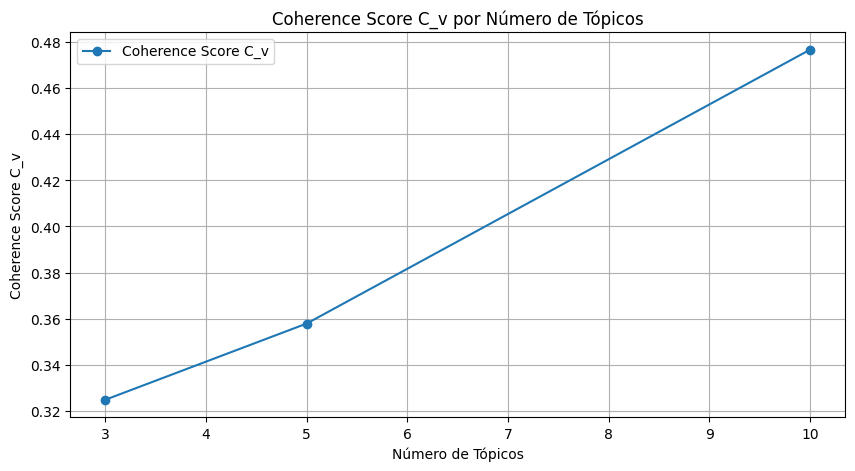

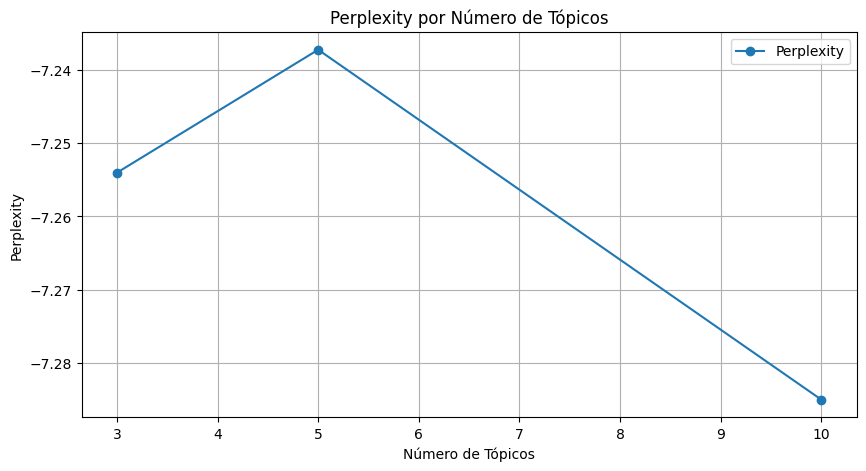

In [412]:
print("\nResultados de Evaluación LDA")

for num_topics in num_topics_to_try:
    print(f"Número de Tópicos:{num_topics:17d} | Coherence Score C_v: {coherence_scores[num_topics]:14.4f} | Perplexity: {perplexity_scores[num_topics]:11.4f}")

# Vamos a visualizarlos
plt.figure(figsize=(10, 5))
plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o', label='Coherence Score C_v')
plt.title('Coherence Score C_v por Número de Tópicos')
plt.xlabel('Número de Tópicos')
plt.ylabel('Coherence Score C_v')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(perplexity_scores.keys()), list(perplexity_scores.values()), marker='o', label='Perplexity')
plt.title('Perplexity por Número de Tópicos')
plt.xlabel('Número de Tópicos')
plt.ylabel('Perplexity')
plt.grid(True)
plt.legend()
plt.show()

Podemos observar que en Coherence Score el paso de 10 a 15 tópicos no muestran un gran mejora. También que cuanto más aumentamos los tópicos la Perplexity se vuelve más negativa, podría ser que se esta sobreajustando.

Voy a quedarme con 5 tópicos, dado que tenemos Perplexity más alto y la Coherencia es la media


In [413]:
lda_model_final = LdaModel(corpus=corpus, # corpus de documentos en formato bag of words
                         id2word=dictionary,#diccionario que mapea los ids de las palabras originales del corpus
                         num_topics=5, #número de temas a encontrar
                         random_state=42,
                         iterations=5, # iteraciones internas por cada review
                         passes=10, # número de vueltas completas sobre el corpus.
                         alpha='auto' # queremos que el modelo ajuste automáticamente el parametro alpha.
                        )

# Calcular Coherence Score
# mide la calidad e interpretabilidad de lso temas generados
# Cuanto más alta produciera temas que son semánticamente interpretables y consistentes. Y es más comprensible.
coherence_model_lda_final = CoherenceModel(model=lda_model_final, texts=df_final['processed_review'], dictionary=dictionary, coherence='c_v')
coherence_lda_final = coherence_model_lda_final.get_coherence()

# Calcular Perplexity
# Mide que tanbien el modelo se ajusta a los datos
# Cuanto más bajo indica un mejor ajuste
perplexity_lda_final = lda_model_final.log_perplexity(corpus)

In [416]:
print(f"  Coherence Score C_v: {coherence_lda_final:.4f}")
print(f"  Perplexity: {perplexity_lda_final:.4f}")

  Coherence Score C_v: 0.3578
  Perplexity: -7.2372


In [417]:
# Veamos los palabras mas representativas de los primeros 5 temas
word_dict = {};
for i in range(5):
    words = lda_model_final.show_topic(i, topn = 10)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,very,car,light,battery,can
1,not,product,wa,blade,not
2,work,towel,one,car,tire
3,well,use,not,wiper,hose
4,wa,like,bulb,power,use
5,one,not,oil,device,need
6,would,used,price,not,get
7,great,clean,more,unit,ha
8,easy,water,year,phone,tool
9,good,leather,car,can,one


El tema 01, parece general, opiciones y adjetivos.

El tema 02, sugiere que es algún tema relacionado con productos para el auto de limpieza y accesorios.

El tema 03, parece relacionado con iluminación, mantenimiento, precios.

El tema 04, sugiere tema de componentes electricos o partes de automóviles.

El tema 05, sugiere algo relacionado con herramientas, reparaciones o mantenimiento.

In [418]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_final, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.112676 -0.119847       1        1  28.202020
1      0.146339  0.069166       2        1  22.908711
2      0.004664  0.159888       3        1  21.136065
4     -0.055607 -0.131743       4        1  15.128410
3     -0.208072  0.022537       5        1  12.624794, topic_info=         Term         Freq        Total Category  logprob  loglift
234     light  5546.000000  5546.000000  Default  30.0000  30.0000
71    battery  2667.000000  2667.000000  Default  29.0000  29.0000
6         car  9446.000000  9446.000000  Default  28.0000  28.0000
753     towel  3174.000000  3174.000000  Default  27.0000  27.0000
1359    blade  2112.000000  2112.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
252       one   740.089178  8255.101248   Topic5  -5.0162  -0.3423
321       two   559.364925  3355.597749   Topic5  -5.2962   0.2779
106      need   501.209550  3258.902163   Topic5  -5.4060   0.1974
253      only   480.654205  3349.520840   Topic5  -5.4479   0.1281
37       time   466.379186  4404.640723   Topic5  -5.4780  -0.1759

[367 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2562      5  0.999372        ac
1591      4  0.993508  accurate
1591      5  0.004496  accurate
3389      5  0.998998   adapter
2669      1  0.995471  adhesive
...     ...       ...       ...
408       3  0.595575      year
408       4  0.017392      year
408       5  0.102232      year
7275      4  0.995894     zubie
7275      5  0.002274     zubie

[693 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

- Las esferas nos representan los temas descubiertos por el modelo LDA. El tamaño de la esfera es proporcional a la frecuencia del tópico entodo el corpues. Los tópicos 1 (28.2%) y 2(22.9%) son los más frecuentes

- La posición de las esferas nos dice la similitud semántica entre los tópicos. Más cercanos son más similares. Parece que estan razonablemente separados, por lo que podemos deducir que el modelo ha logrado diferenciar entre distintos temas

- En la gráfica de barras de la derecha podemos ver el top 30 de palabras más relevantes para el tema que seleccionemos. Las barras rojas nos muestran la frecuencia de la palabras en el tema y las azules en el corpus.

In [419]:
X = df_final['processed_review_str'] # Texto para TF-IDF
y = df_final['sentiment']
processed_tokens_list = df_final['processed_review'].tolist()

# processed_tokens_train: tokens procesados de entrenamiento.
# processed_tokens_test: tokens procesados de prueba.
X_train_text, X_test_text, y_train, y_test, processed_tokens_train, processed_tokens_test = train_test_split(X, y, processed_tokens_list, test_size=0.2, random_state=42, stratify=y)


In [420]:
# Crear diccionario y corpus para LDA (SOLO con datos de ENTRENAMIENTO)
lda_dictionary = corpora.Dictionary(processed_tokens_train)
lda_dictionary.filter_extremes(no_below=5, no_above=0.5)

# Vamos a pasar nuestros token procesados a "bag of words"
lda_corpus_train = [lda_dictionary.doc2bow(review) for review in processed_tokens_train]
lda_corpus_test = [lda_dictionary.doc2bow(review) for review in processed_tokens_test]

In [421]:
num_topics_for_classification = 5

# Entrenar el modelo LDA
lda_model = LdaModel(corpus=lda_corpus_train,
                     id2word=lda_dictionary,
                     num_topics=num_topics_for_classification,
                     random_state=42,
                     passes=10,
                     alpha='auto'
                    )


In [422]:
# Función para extraer las distribuciones de tópicos
def get_topic_distribution(lda_model, corpus, num_topics):
    # Inicializamos una matriz a ceros
    topic_features = np.zeros((len(corpus), num_topics))

    for i, doc_bow in enumerate(corpus):
      # Para cada documento obtenemos la distribución de temas
        for topic_id, prop in lda_model.get_document_topics(doc_bow):
          #Asignamos la proporción de cada tema a la posición correspondiente dle vector del documento.
            topic_features[i, topic_id] = prop

    return topic_features # es una matriz donde cada fila representa un documento y cada columna la proporción de tema especifico

#Matriz de distribución de temas para cada documento de entranmiento
X_train_topics = get_topic_distribution(lda_model, lda_corpus_train, num_topics_for_classification)
#Matriz de distribución de temas para cada documento de prueba
X_test_topics = get_topic_distribution(lda_model, lda_corpus_test, num_topics_for_classification)

print(f"Dimensiones de características de tópicos para entrenamiento: {X_train_topics.shape}")
print(f"Dimensiones de características de tópicos para prueba: {X_test_topics.shape}")

Dimensiones de características de tópicos para entrenamiento: (16378, 5)
Dimensiones de características de tópicos para prueba: (4095, 5)


In [423]:
# Convertimos los textos de entrenamiento y prueba en vectores numéricos y así despues poder usarlos para nuestro modelo de clasificación.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
# Tranformamos los textos de prueba, usando el vocabulario y los pesos parendidos en el entrenamiento
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"Dimensiones de características TF-IDF para entrenamiento: {X_train_tfidf.shape}")
print(f"Dimensiones de características TF-IDF para prueba: {X_test_tfidf.shape}")

Dimensiones de características TF-IDF para entrenamiento: (16378, 5000)
Dimensiones de características TF-IDF para prueba: (4095, 5000)


In [424]:
# Vamos a concatenar nuestras caracteristicas de tópicos con las que teníamos.
X_train_combined = np.hstack((X_train_tfidf.toarray(), X_train_topics))
X_test_combined = np.hstack((X_test_tfidf.toarray(), X_test_topics))

print(f"Dimensiones de características combinadas para entrenamiento: {X_train_combined.shape}")
print(f"Dimensiones de características combinadas para prueba: {X_test_combined.shape}")

Dimensiones de características combinadas para entrenamiento: (16378, 5005)
Dimensiones de características combinadas para prueba: (4095, 5005)


In [425]:
# vamos a probar tambien con el modelo Linear SVM
# class_weight='balanced' para darle mayor importancia a la clase 'negativa'
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'),
    # Lo usaremos por su eficiencia en alta dimensionalidad
    # Su principio es encontrar un hiperplano (la frontera de decisión). Buscando un margen óptimo que nos ayudara a generalizar.
    "Linear SVM": LinearSVC(random_state=42, dual=False, class_weight='balanced')
}

In [426]:
results = {}

for name, model in models.items():
    print(f"\nModelo: {name} (con TF-IDF + LDA Tópicos)")

    # Crear un pipeline simple para SMOTE y el clasificador por el tfidf_vectorizer ya lo aplicamos antes.
    smote_pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    # Entrenamiento del Modelo
    # Pasa las características combinadas (TF-IDF + tópicos)
    smote_pipeline.fit(X_train_combined, y_train)

    # Predicción en el conjunto de prueba
    y_pred = smote_pipeline.predict(X_test_combined)

    # Evaluación del Modelo
    print("\nReporte de Clasificación:")
    report = classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo'])
    print(report)

    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Real Negativo', 'Real Positivo'], columns=['Pred Negativo', 'Pred Positivo'])
    print(cm_df)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=['Negativo', 'Positivo'])
    results[name] = {
        'classification_report': report,
        'confusion_matrix': cm_df,
        'accuracy': accuracy,
        'f1_negativo': classification_report(y_test, y_pred, output_dict=True)['Negativo']['f1-score'],
        'f1_positivo': classification_report(y_test, y_pred, output_dict=True)['Positivo']['f1-score'],
        'recall_negativo': classification_report(y_test, y_pred, output_dict=True)['Negativo']['recall'],
        'recall_positivo': classification_report(y_test, y_pred, output_dict=True)['Positivo']['recall'],
        'precision_negativo': classification_report(y_test, y_pred, output_dict=True)['Negativo']['precision'],
        'precision_positivo': classification_report(y_test, y_pred, output_dict=True)['Positivo']['precision']
    }
    print("-" * 80)


Modelo: Logistic Regression (con TF-IDF + LDA Tópicos)

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.40      0.71      0.51       516
    Positivo       0.95      0.85      0.90      3579

    accuracy                           0.83      4095
   macro avg       0.68      0.78      0.71      4095
weighted avg       0.88      0.83      0.85      4095


Matriz de Confusión:
               Pred Negativo  Pred Positivo
Real Negativo            366            150
Real Positivo            543           3036

Accuracy: 0.8308
--------------------------------------------------------------------------------

Modelo: Linear SVM (con TF-IDF + LDA Tópicos)

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.40      0.63      0.49       516
    Positivo       0.94      0.86      0.90      3579

    accuracy                           0.83      4095
   macro avg       0.67      0.75      0.69  

**Comparación modelo Logistic Regression con y sin LDA**

Podemos observar que el Accuracy es ligeramente mejor que la Regresión Logística sin LDA.

En la clase 'negativa':
  - En Precision vemos una ligera mejora de 0.39 a 0.40
  - En Recall igualmente de 0.70 a 0.71
  - F1-Score también de 0.50 a 0.51

En la clase 'positiva':
  - Precisión se mantiene alta
  - Recall ligera mejora de 0.84 a 0.85
  - F1-Score igualmente 0.89 a 0.90

En la matriz de confusión podemos observar que existe una mejora en general:
  - Los Verdaderos Negativos siendo de 366 (en vez de 359)
  - Los Falsos Negativos siendo de 543 (en vez de 562)
  - Los Verdaderos Positivos siendo de 3,036 (en vez de 3,017)
  - Los Falsos Positivos siendo de 150 (en vez de 157)

En general podemos ver una ligera mejora.  

**Comparación modelo Logistic Regression con Linear SVM**

Observamos:

  - La precisión general es un poco mayor en Linear SVM.
  
  - Clase Negativa:
    - La precisión es igual en ambos modelos.
    - Recall es mayor en Logistic Regression, es decir que es capaz de identificar un procentaje mayor de todas las reseñas negativas reales (71% vs 63%)
    - El F1-Score es un poco superior en Logistic Regression (0.51 vs 0.49)

  - Clase Positiva:
      - La precisión es ligeramente mayor en Logistic Regression (0.95 vs 0.94).
      - Recall es un poco mayor en Linear SVM (0.86 vs 0.85)
      - El F1-Score es igual en ambos modelos

  
  En cuanto a matriz de confusión:

   - El modelo Linear SVM produce menos Falsos Negativos. Esto significa quees mejor para evitar clasificar reseñas positivas como negativas.
   - El modelo Logistic Regression produce menos FAlsos Positivos. Estosignifica que es mejor para evitar clasificar reseñas negativas como positivas.


Con toda esta información confirmo que es mejor el modelo **Logistic Regression (con TF-IDF + LDA Tópicos)** dado que tiene mejores métricas para identificar la mayor cantidad posible de reseñas negativas, es lo que buscamos basandonos en nuestro desequilibrio.